

<p align="center">
  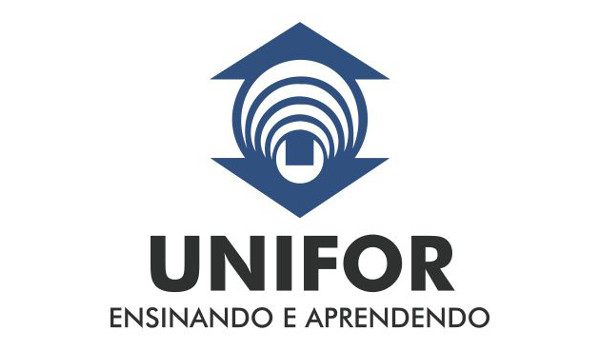</p>
<h1 style='text-align: center;'>UNIFOR - Universidade de Fortaleza</h1>
<h2 style='text-align: center;'>MBA EM CIÊCIA DE DADOS - REDES COMPLEXAS</h2>
<h4 style='text-align: center;'>PROF. ERNERSON A. OLIVERIA  </h4>
<h4 style='text-align: center;'>JOSÉ VALCLEMIR RODRIGUES DA SILVA</h4>
<br><br>
<h4 style='text-align: center;'>Fortaleza-Ceará</h4>



In [1]:
import glob
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pylab
import plotly.graph_objects as go
from pyvis.network import Network
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import defaultdict
import networkx as nx
import nxviz as nxv
import community
import EoN
import powerlaw
import re 

C:\Users\valclemir\AppData\Roaming\Python\Python37\site-packages\nxviz\__init__.py:29: UserWarning:


nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)




## Pré-processamento

###  Carrega os dados da primeira a ultima temporada

In [2]:
# Season 01
path1 = 'datasets/datasets/genius/s01/*.txt'
files1 = glob.glob(path1)

got1 = {}
for file in sorted(files1):
    key1 = file[24:-4]

    
    with open(file,'r',encoding='utf-8') as f:
        text1 = f.readlines()

        
        got1[key1] = text1

In [3]:
# Season 02
path2 =  'datasets/datasets/genius/s02/*.txt'
files2 = glob.glob(path2)

got2 = {}
for file in sorted(files2):
    key2 = file[24:-4]

    
    with open(file,'r',encoding='utf-8') as f:
        text2 = f.readlines()

        
        got2[key2] = text2

In [4]:
# Season 03        
path3 = 'datasets\datasets\genius\s03\*.txt'
files3 = glob.glob(path3)


got3 = {}
for file in sorted(files3):
    key3 = file[24:-4]
    
    
    with open(file,'r',encoding='utf-8') as f:
        text3 = f.readlines()

        
        got3[key3] = text3

In [5]:
# Season 04
path4 =  'datasets/datasets/genius/s04/*.txt'
files4= glob.glob(path4)

got4 = {}
for file in sorted(files4):
    key4 = file[24:-4]

    
    with open(file,'r',encoding='utf-8') as f:
        text4 = f.readlines()

        
        got4[key4] = text4

In [6]:
# Season 05
path5 =  'datasets/datasets/genius/s05/*.txt'
files5= glob.glob(path5)

got5 = {}
for file in sorted(files5):
    key5 = file[24:-4]

    
    with open(file,'r',encoding='utf-8') as f:
        text5 = f.readlines()

        
        got5[key5] = text5

In [7]:
# Season 06
path6 =  'datasets/datasets/genius/s06/*.txt'
files6= glob.glob(path6)

got6 = {}
for file in sorted(files6):
    key6 = file[24:-4]

    
    with open(file,'r',encoding='utf-8') as f:
        text6 = f.readlines()

        
        got6[key6] = text6

In [8]:
# Season 07
path7 =  'datasets/datasets/genius/s07/*.txt'
files7= glob.glob(path7)

got7 = {}
for file in sorted(files7):
    key7 = file[24:-4]

    
    with open(file,'r',encoding='utf-8') as f:
        text7 = f.readlines()

        
        got7[key7] = text7

In [9]:
# Season 08
path8 =  'datasets/datasets/genius/s08/*.txt'
files8= glob.glob(path8)

got8 = {}
for file in sorted(files8):
    key8 = file[24:-4]

    
    with open(file,'r',encoding='utf-8') as f:
        text8 = f.readlines()

        
        got8[key8] = text8

### Limpeza dos dados -  Temporada a Temporada 01 a 08

In [10]:
#Season 01
dicionario_season_01 ={}
i = 0
person = []

for n in list(got1):
    for k in got1[n]:
        x = re.split(":", k, 0)
        if not re.search(":", k) and k != '\n':
            key = str(n).upper() + "/" + str(i)  
            person = [] 
            i +=1                                      
        if re.search(":", k) and k != '\n':
            value = x[0]
            if (value.find('#') == -1 and 
                value.find('.') == -1 and 
                value.find('/') == -1 and 
                value.find('(') == -1 and 
                value.find('"') == -1 and
                value.find('MAN') == -1 and
                value.find('MEN') == -1 and                
                value.find('GUARD') == -1 and
                value.find('INT') == -1 and
                value.find('EXT') == -1 and
                value.find('CUT') == -1 and                
                value.find('SOLDIER') == -1 ):
                person.append(value.capitalize())
                dicionario_season_01[key] = person
    i = 0

#Season 02    
dicionario_season_02 ={}
i = 0
person = []

for n in list(got2):
    for k in got2[n]:
        x = re.split(":", k, 0)
        if not re.search(":", k) and k != '\n':
            key = str(n).upper() + "/" + str(i)  
            person = [] 
            i +=1                                      
        if re.search(":", k) and k != '\n':
            value = x[0]
            if (value.find('#') == -1 and 
                value.find('.') == -1 and 
                value.find('/') == -1 and 
                value.find('(') == -1 and 
                value.find('"') == -1 and
                value.find('MAN') == -1 and
                value.find('MEN') == -1 and                
                value.find('GUARD') == -1 and
                value.find('INT') == -1 and
                value.find('EXT') == -1 and
                value.find('CUT') == -1 and                
                value.find('SOLDIER') == -1 ):
                person.append(value.capitalize())
                dicionario_season_02[key] = person
    i = 0 
#Season 03
dicionario_season_03 ={}
i = 0
person = []

for n in list(got3):
    for k in got3[n]:
        x = re.split(":", k, 0)
        if not re.search(":", k) and k != '\n':
            key = str(n).upper() + "/" + str(i)  
            person = [] 
            i +=1                                      
        if re.search(":", k) and k != '\n':
            value = x[0]
            if (value.find('#') == -1 and 
                value.find('.') == -1 and 
                value.find('/') == -1 and 
                value.find('(') == -1 and 
                value.find('"') == -1 and
                value.find('MAN') == -1 and
                value.find('MEN') == -1 and                
                value.find('GUARD') == -1 and
                value.find('INT') == -1 and
                value.find('EXT') == -1 and
                value.find('CUT') == -1 and                
                value.find('SOLDIER') == -1 ):
                person.append(value.capitalize())
                dicionario_season_03[key] = person
    i = 0

#Season 04    
dicionario_season_04 ={}
i = 0
person = []

for n in list(got4):
    for k in got4[n]:
        x = re.split(":", k, 0)
        if not re.search(":", k) and k != '\n':
            key = str(n).upper() + "/" + str(i)  
            person = [] 
            i +=1                                      
        if re.search(":", k) and k != '\n':
            value = x[0]
            if (value.find('#') == -1 and 
                value.find('.') == -1 and 
                value.find('/') == -1 and 
                value.find('(') == -1 and 
                value.find('"') == -1 and
                value.find('MAN') == -1 and
                value.find('MEN') == -1 and                
                value.find('GUARD') == -1 and
                value.find('INT') == -1 and
                value.find('EXT') == -1 and
                value.find('CUT') == -1 and                
                value.find('SOLDIER') == -1 ):
                person.append(value.capitalize())
                dicionario_season_04[key] = person
    i = 0 

#Season 05    
dicionario_season_05 ={}
i = 0
person = []

for n in list(got5):
    for k in got5[n]:
        x = re.split(":", k, 0)
        if not re.search(":", k) and k != '\n':
            key = str(n).upper() + "/" + str(i)  
            person = [] 
            i +=1                                      
        if re.search(":", k) and k != '\n':
            value = x[0]
            if (value.find('#') == -1 and 
                value.find('.') == -1 and 
                value.find('/') == -1 and 
                value.find('(') == -1 and 
                value.find('"') == -1 and
                value.find('MAN') == -1 and
                value.find('MEN') == -1 and                
                value.find('GUARD') == -1 and
                value.find('INT') == -1 and
                value.find('EXT') == -1 and
                value.find('CUT') == -1 and                
                value.find('SOLDIER') == -1 ):
                person.append(value.capitalize())
                dicionario_season_05[key] = person
    i = 0

#Season 06    
dicionario_season_06 ={}
i = 0
person = []

for n in list(got6):
    for k in got6[n]:
        x = re.split(":", k, 0)
        if not re.search(":", k) and k != '\n':
            key = str(n).upper() + "/" + str(i)  
            person = [] 
            i +=1                                      
        if re.search(":", k) and k != '\n':
            value = x[0]
            if (value.find('#') == -1 and 
                value.find('.') == -1 and 
                value.find('/') == -1 and 
                value.find('(') == -1 and 
                value.find('"') == -1 and
                value.find('MAN') == -1 and
                value.find('MEN') == -1 and                
                value.find('GUARD') == -1 and
                value.find('INT') == -1 and
                value.find('EXT') == -1 and
                value.find('CUT') == -1 and                
                value.find('SOLDIER') == -1 ):
                person.append(value.capitalize())
                dicionario_season_06[key] = person
    i = 0 

#Season 07    
dicionario_season_07 ={}
i = 0
person = []

for n in list(got7):
    for k in got7[n]:
        x = re.split(":", k, 0)
        if not re.search(":", k) and k != '\n':
            key = str(n).upper() + "/" + str(i)  
            person = [] 
            i +=1                                      
        if re.search(":", k) and k != '\n':
            value = x[0]
            if (value.find('#') == -1 and 
                value.find('.') == -1 and 
                value.find('/') == -1 and 
                value.find('(') == -1 and 
                value.find('"') == -1 and
                value.find('MAN') == -1 and
                value.find('MEN') == -1 and                
                value.find('GUARD') == -1 and
                value.find('INT') == -1 and
                value.find('EXT') == -1 and
                value.find('CUT') == -1 and                
                value.find('SOLDIER') == -1 ):
                person.append(value.capitalize())
                dicionario_season_07[key] = person
    i = 0 

#Season 08    
dicionario_season_08 ={}
i = 0
person = []

for n in list(got8):
    for k in got8[n]:
        x = re.split(":", k, 0)
        if not re.search(":", k) and k != '\n':
            key = str(n).upper() + "/" + str(i)  
            person = [] 
            i +=1                                      
        if re.search(":", k) and k != '\n':
            value = x[0]
            if (value.find('#') == -1 and 
                value.find('.') == -1 and 
                value.find('/') == -1 and 
                value.find('(') == -1 and 
                value.find('"') == -1 and
                value.find('MAN') == -1 and
                value.find('MEN') == -1 and                
                value.find('GUARD') == -1 and
                value.find('INT') == -1 and
                value.find('EXT') == -1 and
                value.find('CUT') == -1 and                
                value.find('SOLDIER') == -1 ):
                person.append(value.capitalize())
                dicionario_season_08[key] = person
    i = 0 


### Definindo o Dataframe - Edges Season 01 a 08

In [11]:
# populando os DataFrames
# Season 01
edges_season_01 = pd.DataFrame(columns = ['Source','Target'])
for  key, value in dicionario_season_01.items():
     for k,j in enumerate(value):
            if value[k] != value[k-1] and k > 0:
                edges_season_01 = edges_season_01.append({'Source':value[k],'Target':value[k-1]},ignore_index = True)
edges_season_01 = edges_season_01.groupby(['Source', 'Target']).size().reset_index(name="Weight")
edges_season_01['Season'] = 1

# Season 02
edges_season_02 = pd.DataFrame(columns = ['Source','Target'])
for  key, value in dicionario_season_02.items():
     for k,j in enumerate(value):
            if value[k] != value[k-1] and k > 0:
                edges_season_02 = edges_season_02.append({'Source':value[k],'Target':value[k-1]},ignore_index = True)
edges_season_02 = edges_season_02.groupby(['Source', 'Target']).size().reset_index(name="Weight")
edges_season_02['Season'] = 2

#Season 03
edges_season_03 = pd.DataFrame(columns = ['Source','Target'])
for  key, value in dicionario_season_03.items():
     for k,j in enumerate(value):
            if value[k] != value[k-1] and k > 0:
                edges_season_03 = edges_season_03.append({'Source':value[k],'Target':value[k-1]},ignore_index = True)
edges_season_03 = edges_season_03.groupby(['Source', 'Target']).size().reset_index(name="Weight")
edges_season_03['Season'] = 3

#Season 04
edges_season_04 = pd.DataFrame(columns = ['Source','Target'])
for  key, value in dicionario_season_04.items():
     for k,j in enumerate(value):
            if value[k] != value[k-1] and k > 0:
                edges_season_04 = edges_season_04.append({'Source':value[k],'Target':value[k-1]},ignore_index = True)
edges_season_04 = edges_season_04.groupby(['Source', 'Target']).size().reset_index(name="Weight")
edges_season_04['Season'] = 4

#Season 05
edges_season_05 = pd.DataFrame(columns = ['Source','Target'])
for  key, value in dicionario_season_05.items():
     for k,j in enumerate(value):
            if value[k] != value[k-1] and k > 0:
                edges_season_05 = edges_season_05.append({'Source':value[k],'Target':value[k-1]},ignore_index = True)
edges_season_05 = edges_season_05.groupby(['Source', 'Target']).size().reset_index(name="Weight")
edges_season_05['Season'] = 5

#Season 06
edges_season_06 = pd.DataFrame(columns = ['Source','Target'])
for  key, value in dicionario_season_06.items():
     for k,j in enumerate(value):
            if value[k] != value[k-1] and k > 0:
                edges_season_06 = edges_season_06.append({'Source':value[k],'Target':value[k-1]},ignore_index = True)
edges_season_06 = edges_season_06.groupby(['Source', 'Target']).size().reset_index(name="Weight")
edges_season_06['Season'] = 6

#Season 07
edges_season_07 = pd.DataFrame(columns = ['Source','Target'])
for  key, value in dicionario_season_07.items():
     for k,j in enumerate(value):
            if value[k] != value[k-1] and k > 0:
                edges_season_07 = edges_season_07.append({'Source':value[k],'Target':value[k-1]},ignore_index = True)
edges_season_07 = edges_season_07.groupby(['Source', 'Target']).size().reset_index(name="Weight")
edges_season_07['Season'] = 7

#Season 08
edges_season_08 = pd.DataFrame(columns = ['Source','Target'])
for  key, value in dicionario_season_08.items():
     for k,j in enumerate(value):
            if value[k] != value[k-1] and k > 0:
                edges_season_08 = edges_season_08.append({'Source':value[k],'Target':value[k-1]},ignore_index = True)
edges_season_08 = edges_season_08.groupby(['Source', 'Target']).size().reset_index(name="Weight")
edges_season_08['Season'] = 8

### Formatando os Nodes a partir de Source e Target Season 01 a 08

In [12]:
# Season 01
nodes_s01= pd.DataFrame(edges_season_01['Source'])
nodes_s01.rename(columns={'Source': 'Label'}, inplace = True)
nodes_t01 = pd.DataFrame(edges_season_01["Target"])
nodes_t01.rename(columns={'Target': 'Label'}, inplace = True)

# Season 02
nodes_s02= pd.DataFrame(edges_season_02['Source'])
nodes_s02.rename(columns={'Source': 'Label'}, inplace = True)
nodes_t02 = pd.DataFrame(edges_season_02["Target"])
nodes_t02.rename(columns={'Target': 'Label'}, inplace = True)

# Season 03
nodes_s03= pd.DataFrame(edges_season_03['Source'])
nodes_s03.rename(columns={'Source': 'Label'}, inplace = True)
nodes_t03 = pd.DataFrame(edges_season_03["Target"])
nodes_t03.rename(columns={'Target': 'Label'}, inplace = True)

# Season 04
nodes_s04= pd.DataFrame(edges_season_04['Source'])
nodes_s04.rename(columns={'Source': 'Label'}, inplace = True)
nodes_t04 = pd.DataFrame(edges_season_04["Target"])
nodes_t04.rename(columns={'Target': 'Label'}, inplace = True)

# Season 05
nodes_s05= pd.DataFrame(edges_season_05['Source'])
nodes_s05.rename(columns={'Source': 'Label'}, inplace = True)
nodes_t05 = pd.DataFrame(edges_season_05["Target"])
nodes_t05.rename(columns={'Target': 'Label'}, inplace = True)

# Season 06
nodes_s06= pd.DataFrame(edges_season_06['Source'])
nodes_s06.rename(columns={'Source': 'Label'}, inplace = True)
nodes_t06 = pd.DataFrame(edges_season_06["Target"])
nodes_t06.rename(columns={'Target': 'Label'}, inplace = True)

# Season 07
nodes_s07= pd.DataFrame(edges_season_07['Source'])
nodes_s07.rename(columns={'Source': 'Label'}, inplace = True)
nodes_t07 = pd.DataFrame(edges_season_07["Target"])
nodes_t07.rename(columns={'Target': 'Label'}, inplace = True)

# Season 08
nodes_s08= pd.DataFrame(edges_season_08['Source'])
nodes_s08.rename(columns={'Source': 'Label'}, inplace = True)
nodes_t08 = pd.DataFrame(edges_season_08["Target"])
nodes_t08.rename(columns={'Target': 'Label'}, inplace = True)

In [13]:
# unindo os DF source e target, removendo duplicados, para gerar nodes final
#season 01
Nodes_01 = pd.concat([nodes_s01,nodes_t01])
Nodes_01.drop_duplicates(subset='Label', keep='first', inplace=True)
Nodes_01['id'] = Nodes_01['Label'].str.upper()
Nodes_01 = Nodes_01.reindex(columns=['id','Label'])

#season 02
Nodes_02 = pd.concat([nodes_s02,nodes_t02])
Nodes_02.drop_duplicates(subset='Label', keep='first', inplace=True)
Nodes_02['id'] = Nodes_02['Label'].str.upper()
Nodes_02 = Nodes_02.reindex(columns=['id','Label'])

#season 03
Nodes_03 = pd.concat([nodes_s03,nodes_t03])
Nodes_03.drop_duplicates(subset='Label', keep='first', inplace=True)
Nodes_03['id'] = Nodes_03['Label'].str.upper()
Nodes_03 = Nodes_03.reindex(columns=['id','Label'])

#season 04
Nodes_04 = pd.concat([nodes_s04,nodes_t04])
Nodes_04.drop_duplicates(subset='Label', keep='first', inplace=True)
Nodes_04['id'] = Nodes_04['Label'].str.upper()
Nodes_04 = Nodes_04.reindex(columns=['id','Label'])

#season 05
Nodes_05 = pd.concat([nodes_s05,nodes_t05])
Nodes_05.drop_duplicates(subset='Label', keep='first', inplace=True)
Nodes_05['id'] = Nodes_05['Label'].str.upper()
Nodes_05 = Nodes_05.reindex(columns=['id','Label'])

#season 06
Nodes_06 = pd.concat([nodes_s06,nodes_t06])
Nodes_06.drop_duplicates(subset='Label', keep='first', inplace=True)
Nodes_06['id'] = Nodes_06['Label'].str.upper()
Nodes_06 = Nodes_01.reindex(columns=['id','Label'])

#season 07
Nodes_07 = pd.concat([nodes_s07,nodes_t07])
Nodes_07.drop_duplicates(subset='Label', keep='first', inplace=True)
Nodes_07['id'] = Nodes_07['Label'].str.upper()
Nodes_07 = Nodes_07.reindex(columns=['id','Label'])

#season 08
Nodes_08 = pd.concat([nodes_s08,nodes_t08])
Nodes_08.drop_duplicates(subset='Label', keep='first', inplace=True)
Nodes_08['id'] = Nodes_08['Label'].str.upper()
Nodes_08 = Nodes_08.reindex(columns=['id','Label'])

### Salvando Edges e Nodes

In [14]:
edges_season_01.to_csv('s1-edges.csv', sep=',', index=False,header=True)
edges_season_02.to_csv('s2-edges.csv', sep=',', index=False,header=True)
edges_season_03.to_csv('s3-edges.csv', sep=',', index=False,header=True)
edges_season_04.to_csv('s4-edges.csv', sep=',', index=False,header=True)
edges_season_05.to_csv('s5-edges.csv', sep=',', index=False,header=True)
edges_season_06.to_csv('s6-edges.csv', sep=',', index=False,header=True)
edges_season_07.to_csv('s7-edges.csv', sep=',', index=False,header=True)
edges_season_08.to_csv('s8-edges.csv', sep=',', index=False,header=True)
Nodes_01.to_csv('s1-nodes.csv', sep=',', index=False,header=True)
Nodes_02.to_csv('s2-nodes.csv', sep=',', index=False,header=True)
Nodes_03.to_csv('s3-nodes.csv', sep=',', index=False,header=True)
Nodes_04.to_csv('s4-nodes.csv', sep=',', index=False,header=True)
Nodes_05.to_csv('s5-nodes.csv', sep=',', index=False,header=True)
Nodes_06.to_csv('s6-nodes.csv', sep=',', index=False,header=True)
Nodes_07.to_csv('s7-nodes.csv', sep=',', index=False,header=True)
Nodes_08.to_csv('s8-nodes.csv', sep=',', index=False,header=True)

# Análise dos Dados 

### Carregando DataFrames Edges e Nodes por Season e Agrupando em um Unico Dataframe

In [15]:
#Carregando os arquivos com EDGES
temp1_E = pd.read_csv('s1-edges.csv',
            header = 0,
            usecols=[0, 1, 2,3])
temp2_E = pd.read_csv('s2-edges.csv',
            header = 0,
            usecols=[0, 1, 2,3])
temp3_E = pd.read_csv('s3-edges.csv',
            header = 0,
            usecols=[0, 1, 2,3])
temp4_E = pd.read_csv('s4-edges.csv',
            header = 0,
            usecols=[0, 1, 2,3])
temp5_E = pd.read_csv('s5-edges.csv',
            header = 0,
            usecols=[0, 1, 2,3])
temp6_E= pd.read_csv('s6-edges.csv',
            header = 0,
            usecols=[0, 1, 2,3])
temp7_E= pd.read_csv('s7-edges.csv',
            header = 0,
            usecols=[0, 1, 2,3])
temp8_E= pd.read_csv('s8-edges.csv',
            header = 0,
            usecols=[0, 1, 2,3])

In [16]:
# Criando um unico dataframe com os Vertices (Edges) e somando todos os pesos (Weigths)
data_Edges = temp1_E.append(temp2_E).append(temp3_E).append(temp4_E).append(temp5_E).append(temp6_E).append(temp7_E).append(temp8_E)
data_Edges = data_Edges.groupby(['Source','Target']).agg({'Weight':'sum'}).reset_index()
data_Edges.sort_values('Weight',ascending=False).head()


,Source,Target,Weight
379,Cersei,Jaime,151
2389,Varys,Tyrion,151
865,Jaime,Cersei,149
2295,Tyrion,Varys,136
2243,Tyrion,Cersei,135


In [17]:
# Carregando arquivos Nodes e criando um unico Nodes

temp1_N = pd.read_csv('s1-nodes.csv',
            header = 0,
            usecols=[0, 1])
temp2_N = pd.read_csv('s2-nodes.csv',
            header = 0,
            usecols=[0, 1])
temp3_N = pd.read_csv('s3-nodes.csv',
            header = 0,
            usecols=[0, 1])
temp4_N = pd.read_csv('s4-nodes.csv',
            header = 0,
            usecols=[0, 1])
temp5_N = pd.read_csv('s5-nodes.csv',
            header = 0,
            usecols=[0, 1])
temp6_N= pd.read_csv('s6-nodes.csv',
            header = 0,
            usecols=[0, 1])
temp7_N= pd.read_csv('s7-nodes.csv',
            header = 0,
            usecols=[0, 1])
temp8_N= pd.read_csv('s8-nodes.csv',
            header = 0,
            usecols=[0, 1])

In [18]:
Nodes = temp1_N.append(temp2_N).append(temp3_N).append(temp4_N).append(temp5_N).append(temp6_N).append(temp7_N).append(temp8_N)
Nodes = Nodes.drop_duplicates()
Nodes

,id,Label
0,ADDAM MARBRAND,Addam marbrand
1,ALL,All
2,ALLISER THORNE,Alliser thorne
3,ARYA,Arya
4,ARYA STARK,Arya stark
...,...,...
43,VALE LORD,Vale lord
45,VICKY,Vicky
46,WILLA,Willa
49,UNSULLIED CAPTAIN,Unsullied captain


### Criando rede de Visualização

In [19]:
# gerando rede de visualização por season e a global

G1 = nx.from_pandas_edgelist(temp1_E, source = 'Source', target = 'Target', edge_attr='Weight')
G2 = nx.from_pandas_edgelist(temp2_E, source = 'Source', target = 'Target', edge_attr='Weight')
G3 = nx.from_pandas_edgelist(temp3_E, source = 'Source', target = 'Target', edge_attr='Weight')
G4 = nx.from_pandas_edgelist(temp4_E, source = 'Source', target = 'Target', edge_attr='Weight')
G5 = nx.from_pandas_edgelist(temp5_E, source = 'Source', target = 'Target', edge_attr='Weight')
G6 = nx.from_pandas_edgelist(temp6_E, source = 'Source', target = 'Target', edge_attr='Weight')
G7 = nx.from_pandas_edgelist(temp7_E, source = 'Source', target = 'Target', edge_attr='Weight')
G8 = nx.from_pandas_edgelist(temp8_E, source = 'Source', target = 'Target', edge_attr='Weight')
G = nx.from_pandas_edgelist(data_Edges, source = 'Source', target = 'Target',edge_attr='Weight')

## Rede de Graphos por Temporada e Global

### Season 1

In [20]:
# Definindo paramentros para controle : Size / Color
tam=nx.betweenness_centrality(G1)
col=nx.pagerank(G1)

weights = np.array([i['Weight'] for i in dict(G1.edges).values()])
sizes = np.array([tam[i] for i in G1])
colors = np.array([col[i] for i in G1])

In [21]:
# Definindo os Nodes a partir dos Edges
labels1 = {
    list(G1.nodes)[n]: (list(G1.nodes)[n]
        if len(list(nx.all_neighbors(G1, list(G1.nodes)[n])))
        else '')
    for n in range(len(G1.nodes))
}

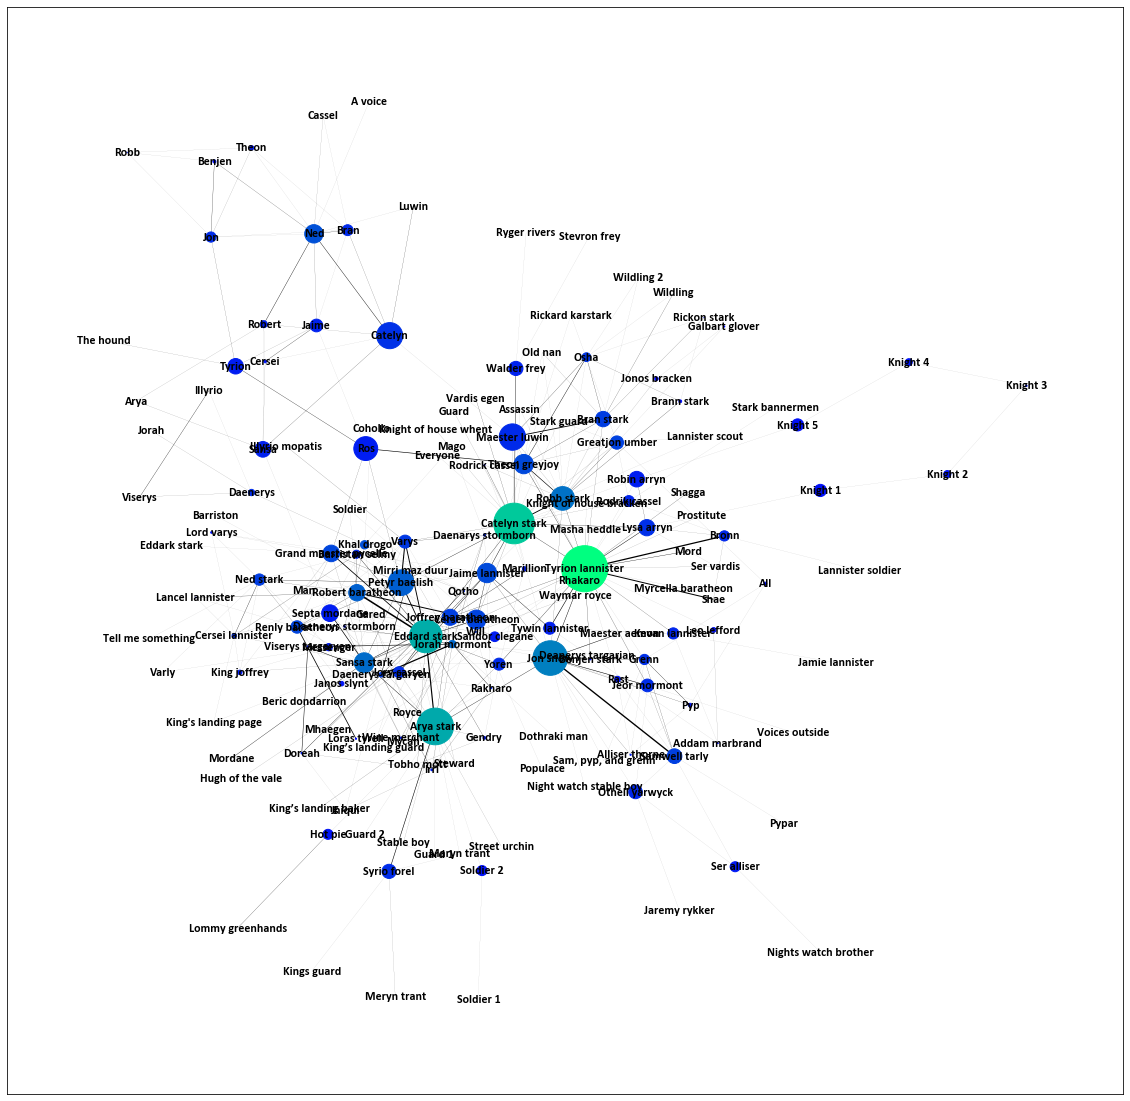

In [22]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G1,
        pos=nx.kamada_kawai_layout(G1),
        node_size=10000*sizes,
        node_color=colors,
        cmap="winter")

nx.draw_networkx_edges(G1,
        pos=nx.kamada_kawai_layout(G1),
        width=0.04*weights)

labels=nx.draw_networkx_labels(G1,
                        pos=nx.kamada_kawai_layout(G1),
                        labels=labels1,
                        font_size=12,
                        font_family="calibri",
                        font_weight="bold")

#### Para a primeira temporada, os personagens de maiores influências são os que estão mais destacados em circulos maiores, exemplo: Tyrion Lannister, Catelyn Stark, Arya Stark e Eddard Stark (Obs: Pra quem assistiu a série, sabe que o Ned Stark foi morto decapitado no nono episódio da primeira temporada, por isso ele tem tanto destaque na primeira temporada)

### Season 2

In [23]:
# Definindo paramentros para controle : Size / Color
tam2=nx.betweenness_centrality(G2)
col2=nx.pagerank(G2)

weights2 = np.array([i['Weight'] for i in dict(G2.edges).values()])
sizes2 = np.array([tam2[i] for i in G2])
colors2 = np.array([col2[i] for i in G2])

In [24]:
# Definindo os Nodes a partir dos Edges
labels2 = {
    list(G2.nodes)[n]: (list(G2.nodes)[n]
        if len(list(nx.all_neighbors(G2, list(G2.nodes)[n])))
        else '')
    for n in range(len(G2.nodes))
}

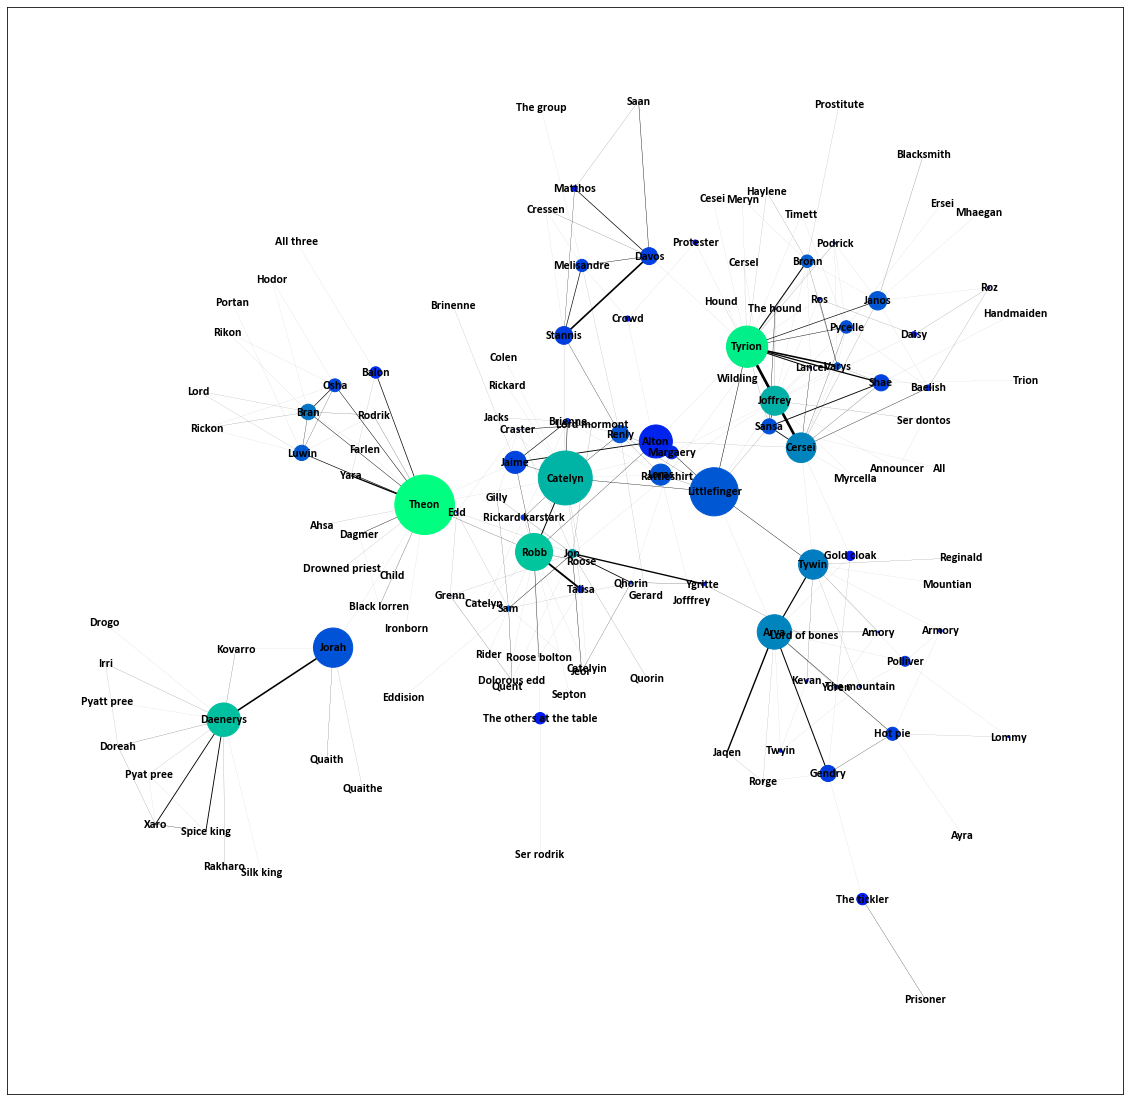

In [25]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G2,
        pos=nx.kamada_kawai_layout(G2),
        node_size=10000*sizes2,
        node_color=colors2,
        cmap="winter")

nx.draw_networkx_edges(G2,
        pos=nx.kamada_kawai_layout(G2),
        width=0.04*weights2)

labels=nx.draw_networkx_labels(G2,
                        pos=nx.kamada_kawai_layout(G2),
                        labels=labels2,
                        font_size=12,
                        font_family="calibri",
                        font_weight="bold")

#### Na segunda temporada, os personagens que mais se destacam são Theon e Robb, pois logo após morte de Ned Stark, Theon se alia ao filho de Ned, Robb Stark. Em paralelo, começa surgir Daenerys com seus 3 dragões que eventualmente, eles se tornarão monstros aterrorizantes capazes de destruir cidades ao seu comando. 

### Season 3

In [26]:
# Definindo paramentros para controle : Size / Color
tam3=nx.betweenness_centrality(G3)
col3=nx.pagerank(G3)

weights3 = np.array([i['Weight'] for i in dict(G3.edges).values()])
sizes3 = np.array([tam3[i] for i in G3])
colors3 = np.array([col3[i] for i in G3])

In [27]:
# Definindo os Nodes a partir dos Edges
labels3 = {
    list(G3.nodes)[n]: (list(G3.nodes)[n]
        if len(list(nx.all_neighbors(G3, list(G3.nodes)[n])))
        else '')
    for n in range(len(G3.nodes))
}

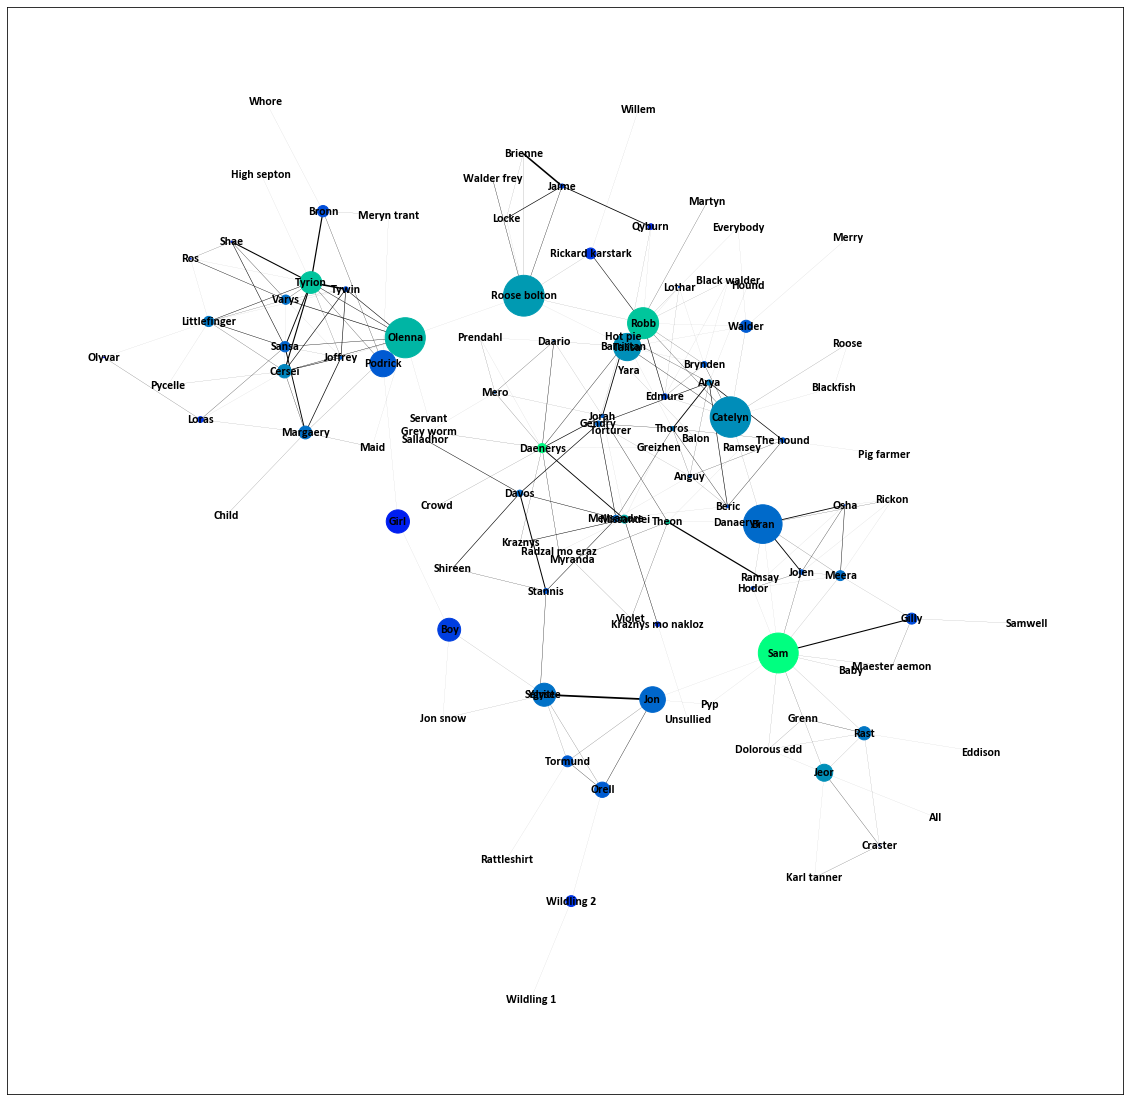

In [28]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G3,
        pos=nx.kamada_kawai_layout(G3),
        node_size=10000*sizes3,
        node_color=colors3,
        cmap="winter")

nx.draw_networkx_edges(G3,
        pos=nx.kamada_kawai_layout(G3),
        width=0.04*weights3)

labels=nx.draw_networkx_labels(G3,
                        pos=nx.kamada_kawai_layout(G3),
                        labels=labels3,
                        font_size=12,
                        font_family="calibri",
                        font_weight="bold")

#### Na terceira temporada, alguns personagens se destacam, como Robb e Bran . Robb Stark após ter ganhado o posto de rei, depois da morte de seu pai, Ned Stark, permanece no campo de batalha, enquanto Bran Stark e seus protetores devem atravessar os desertos congelados do Norte para chegar à Muralha.

### Season 4

In [29]:
# Definindo paramentros para controle : Size / Color
tam4=nx.betweenness_centrality(G4)
col4=nx.pagerank(G4)

weights4 = np.array([i['Weight'] for i in dict(G4.edges).values()])
sizes4 = np.array([tam4[i] for i in G4])
colors4 = np.array([col4[i] for i in G4])

In [30]:
# Definindo os Nodes a partir dos Edges
labels4 = {
    list(G4.nodes)[n]: (list(G4.nodes)[n]
        if len(list(nx.all_neighbors(G4, list(G4.nodes)[n])))
        else '')
    for n in range(len(G4.nodes))
}

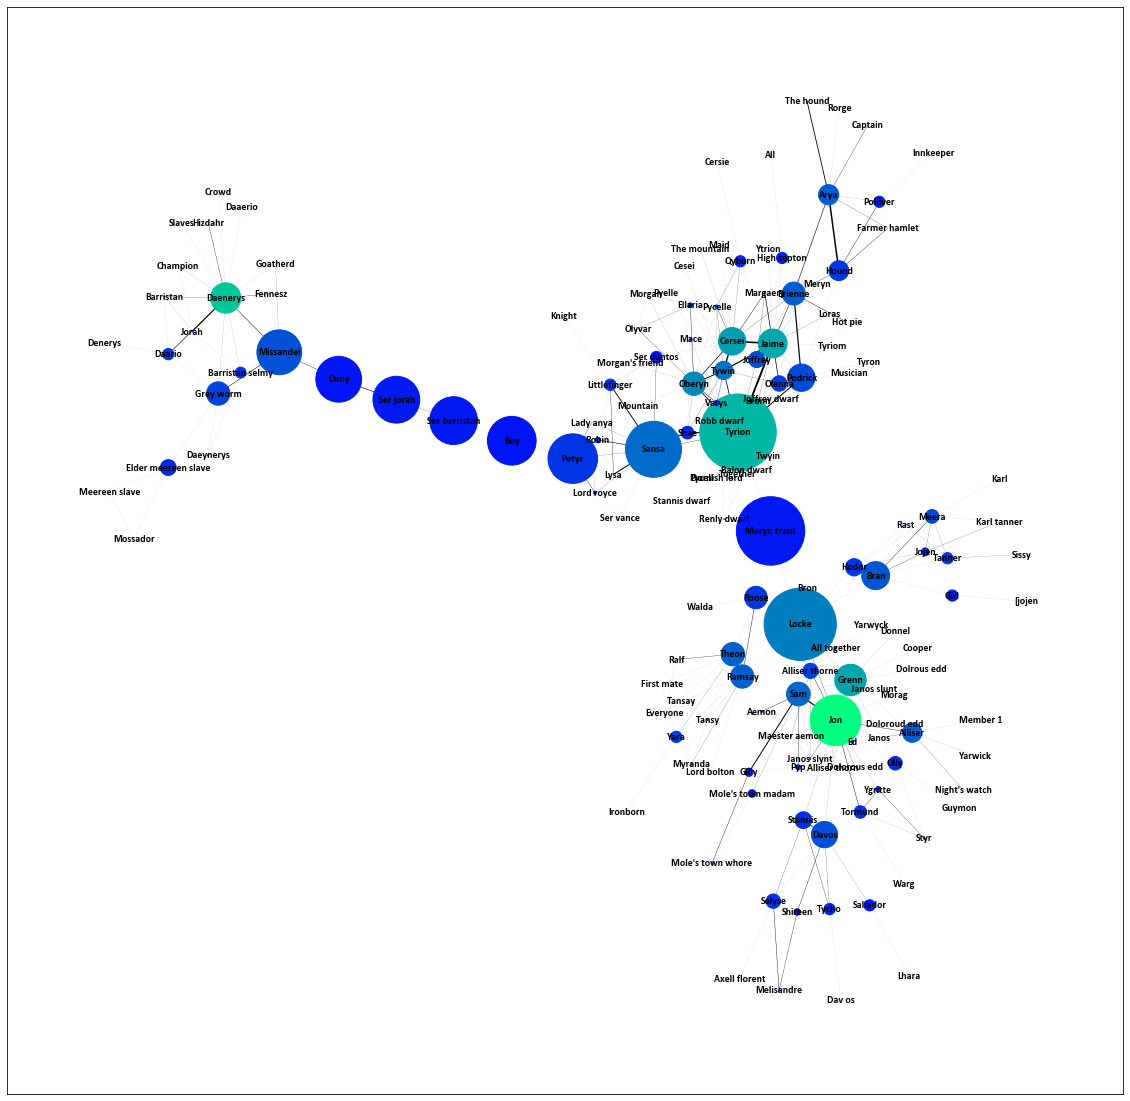

In [31]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G4,
        pos=nx.kamada_kawai_layout(G4),
        node_size=10000*sizes4,
        node_color=colors4,
        cmap="winter")

nx.draw_networkx_edges(G4,
        pos=nx.kamada_kawai_layout(G4),
        width=0.04*weights4)

labels=nx.draw_networkx_labels(G4,
                        pos=nx.kamada_kawai_layout(G4),
                        labels=labels4,
                        font_size=10,
                        font_family="calibri",
                        font_weight="bold")

### Season  5

In [32]:
# Definindo paramentros para controle : Size / Color
tam5=nx.betweenness_centrality(G5)
col5=nx.pagerank(G5)

weights5 = np.array([i['Weight'] for i in dict(G5.edges).values()])
sizes5 = np.array([tam5[i] for i in G5])
colors5 = np.array([col5[i] for i in G5])

In [33]:
# Definindo os Nodes a partir dos Edges
labels5 = {
    list(G5.nodes)[n]: (list(G5.nodes)[n]
        if len(list(nx.all_neighbors(G5, list(G5.nodes)[n])))
        else '')
    for n in range(len(G5.nodes))
}

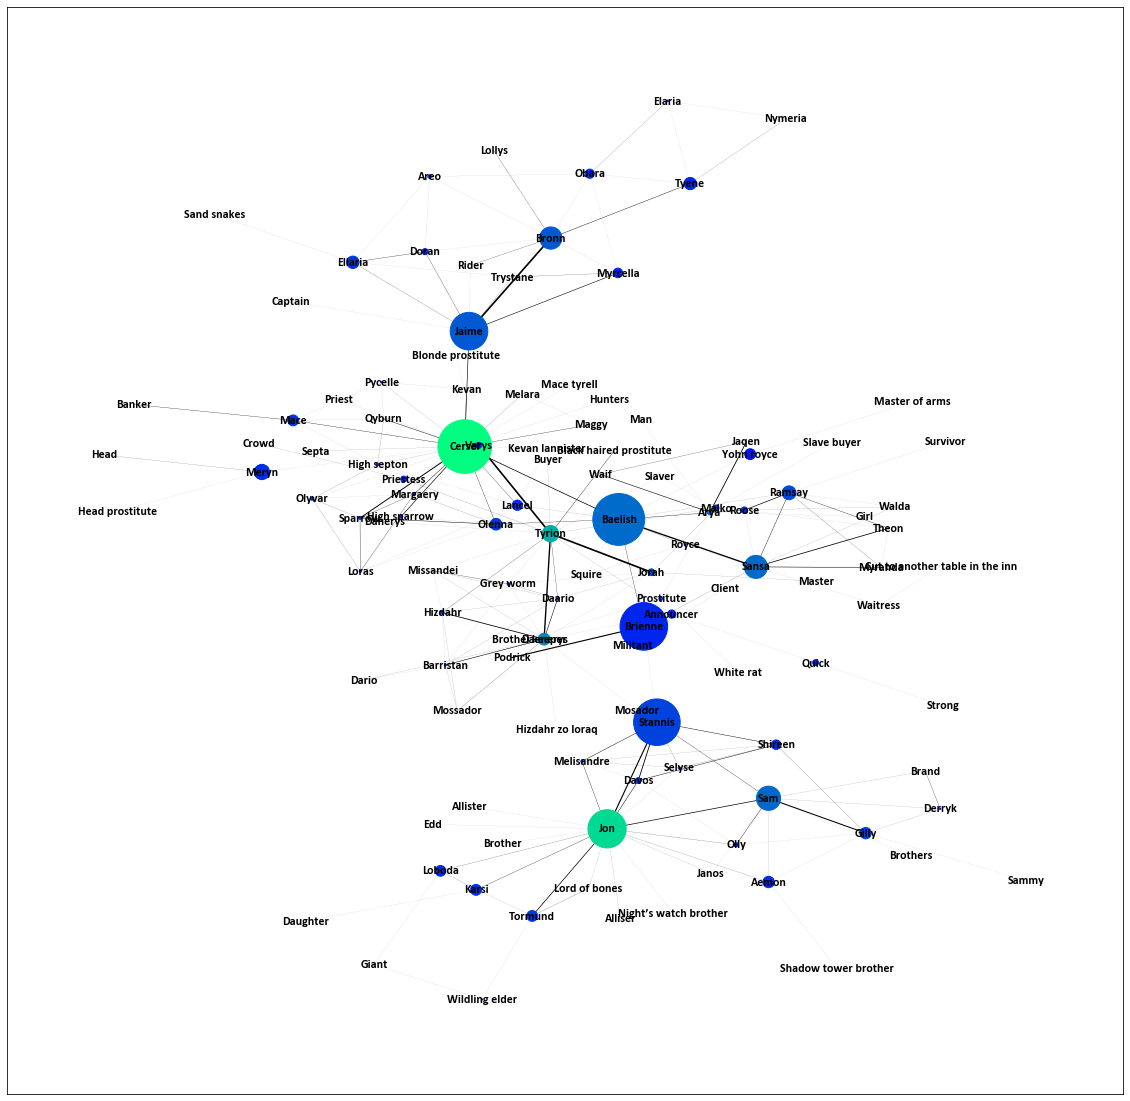

In [34]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G5,
        pos=nx.kamada_kawai_layout(G5),
        node_size=10000*sizes5,
        node_color=colors5,
        cmap="winter")

nx.draw_networkx_edges(G5,
        pos=nx.kamada_kawai_layout(G5),
        width=0.04*weights5)

labels=nx.draw_networkx_labels(G5,
                        pos=nx.kamada_kawai_layout(G5),
                        labels=labels5,
                        font_size=12,
                        font_family="calibri",
                        font_weight="bold")

#### Na quinta temporada, Daenerys recebe um forte destaque, como podemos ver no grafo, ela tem várias conexões e uma das conexões fortes é a Missandei, que teve também um papel importante nessa temporada, fazendo algumas revelações para Daenerys.

### Season 6

In [35]:
# Definindo paramentros para controle : Size / Color
tam6=nx.betweenness_centrality(G6)
col6=nx.pagerank(G6)

weights6 = np.array([i['Weight'] for i in dict(G6.edges).values()])
sizes6 = np.array([tam6[i] for i in G6])
colors6 = np.array([col6[i] for i in G6])

In [36]:
# Definindo os Nodes a partir dos Edges
labels6 = {
    list(G6.nodes)[n]: (list(G6.nodes)[n]
        if len(list(nx.all_neighbors(G6, list(G6.nodes)[n])))
        else '')
    for n in range(len(G6.nodes))
}

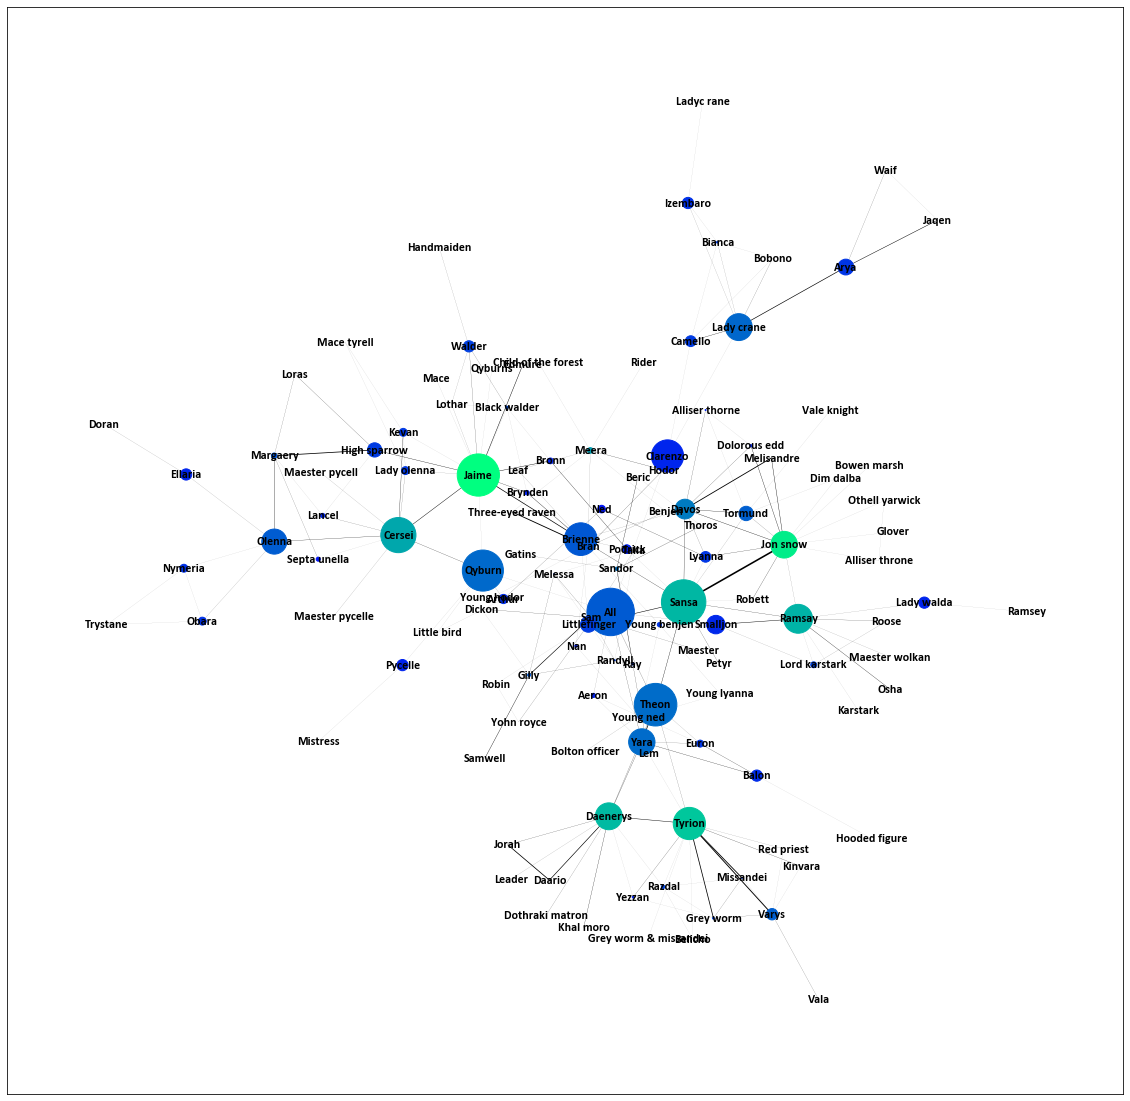

In [37]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G6,
        pos=nx.kamada_kawai_layout(G6),
        node_size=10000*sizes6,
        node_color=colors6,
        cmap="winter")

nx.draw_networkx_edges(G6,
        pos=nx.kamada_kawai_layout(G6),
        width=0.04*weights6)

labels=nx.draw_networkx_labels(G6,
                        pos=nx.kamada_kawai_layout(G6),
                        labels=labels6,
                        font_size=12,
                        font_family="calibri",
                        font_weight="bold")

### Season 7

In [38]:
# Definindo paramentros para controle : Size / Color
tam7=nx.betweenness_centrality(G7)
col7=nx.pagerank(G7)

weights7 = np.array([i['Weight'] for i in dict(G7.edges).values()])
sizes7 = np.array([tam7[i] for i in G7])
colors7 = np.array([col7[i] for i in G7])

In [39]:
# Definindo os Nodes a partir dos Edges
labels7 = {
    list(G7.nodes)[n]: (list(G7.nodes)[n]
        if len(list(nx.all_neighbors(G7, list(G7.nodes)[n])))
        else '')
    for n in range(len(G7.nodes))
}

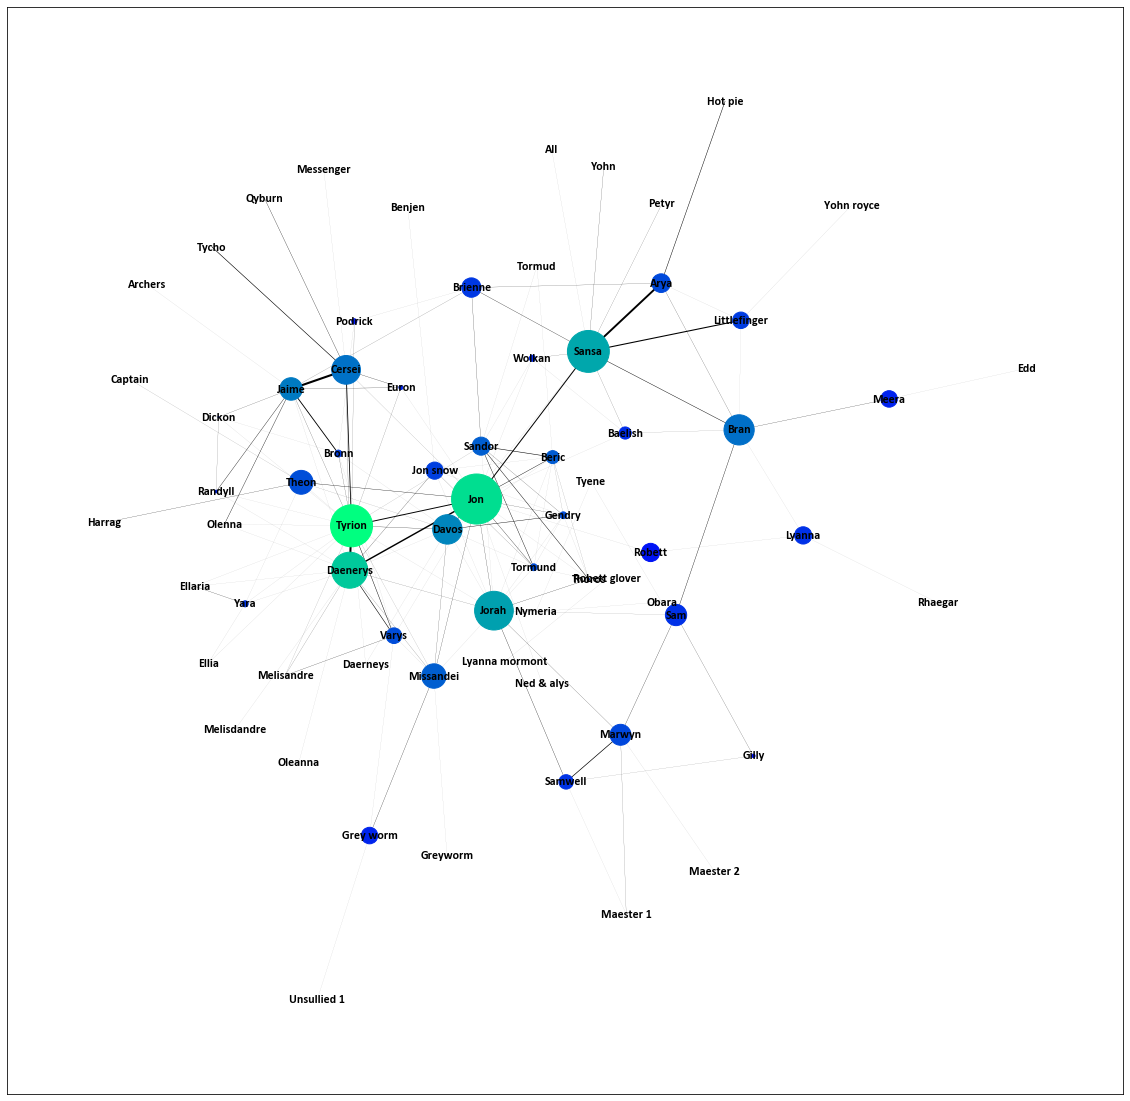

In [40]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G7,
        pos=nx.kamada_kawai_layout(G7),
        node_size=10000*sizes7,
        node_color=colors7,
        cmap="winter")

nx.draw_networkx_edges(G7,
        pos=nx.kamada_kawai_layout(G7),
        width=0.04*weights7)

labels=nx.draw_networkx_labels(G7,
                        pos=nx.kamada_kawai_layout(G7),
                        labels=labels7,
                        font_size=12,
                        font_family="calibri",
                        font_weight="bold")

### Season 8

In [41]:
# Definindo paramentros para controle : Size / Color
tam8=nx.betweenness_centrality(G8)
col8=nx.pagerank(G8)

weights8 = np.array([i['Weight'] for i in dict(G8.edges).values()])
sizes8 = np.array([tam8[i] for i in G8])
colors8 = np.array([col8[i] for i in G8])

In [42]:
# Definindo os Nodes a partir dos Edges
labels8 = {
    list(G8.nodes)[n]: (list(G8.nodes)[n]
        if len(list(nx.all_neighbors(G8, list(G8.nodes)[n])))
        else '')
    for n in range(len(G8.nodes))
}

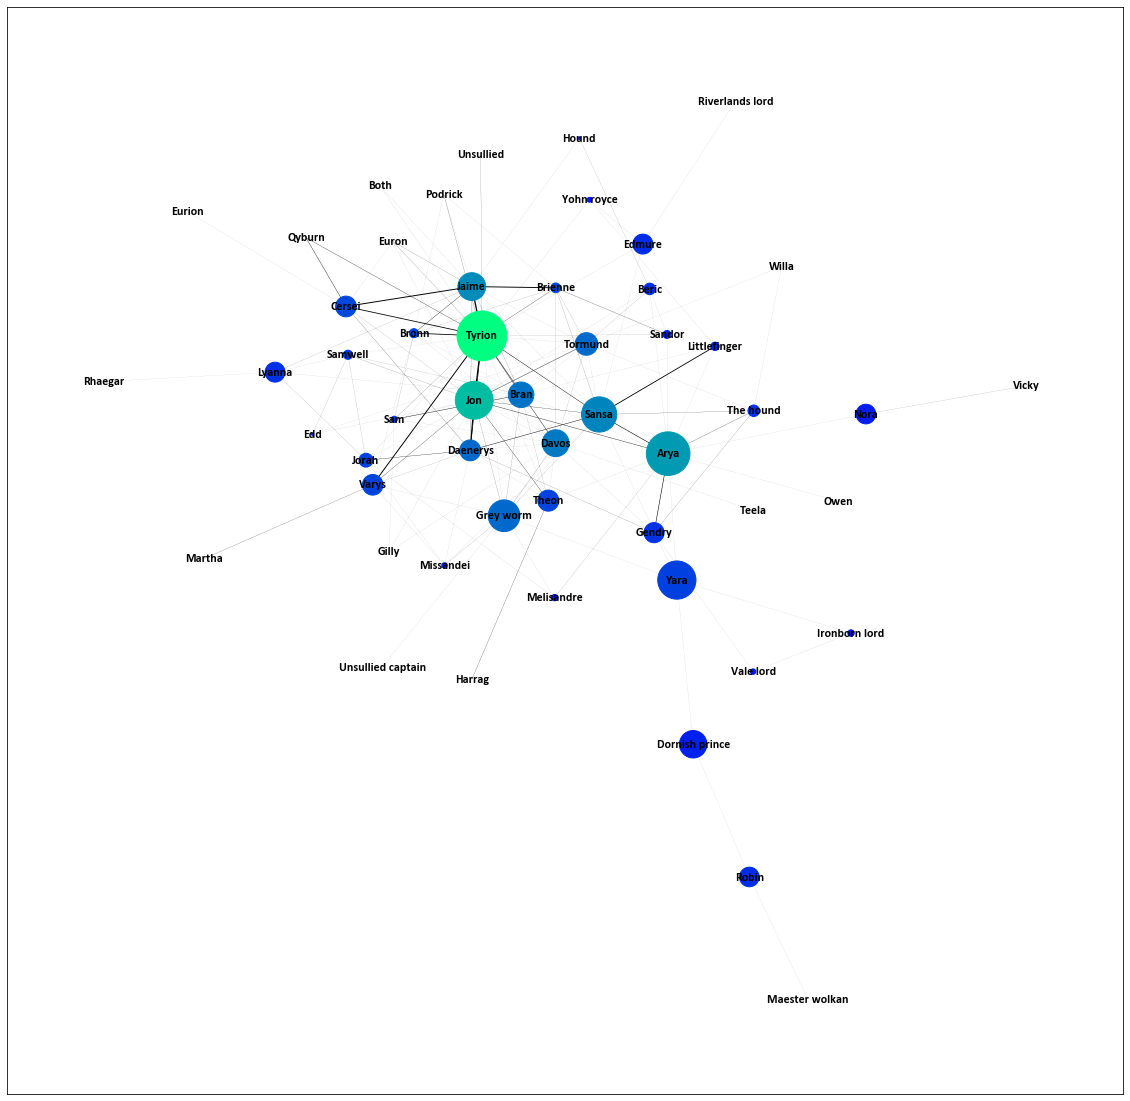

In [43]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G8,
        pos=nx.kamada_kawai_layout(G8),
        node_size=10000*sizes8,
        node_color=colors8,
        cmap="winter")

nx.draw_networkx_edges(G8,
        pos=nx.kamada_kawai_layout(G8),
        width=0.04*weights8)

labels=nx.draw_networkx_labels(G8,
                        pos=nx.kamada_kawai_layout(G8),
                        labels=labels8,
                        font_size=12,
                        font_family="calibri",
                        font_weight="bold")

#### Na última temporada, pra quem assistiu, Tyrion, Jon e Arya tiveram uma grande influência na trama, Tyrion por exemplo, tentou mais uma vez convencer sua irmã a deixar de lado suas inimizades e se unir com Daenerys contra o exército dos mortos, mas seus apelos caíram em ouvidos surdos. Embora ela tenha prometido uma aliança militar com a rainha dragão, Cersei, em vez disso, intermediou um acordo de bastidores: com a ajuda de Euron e o apoio financeiro do Banco de Ferro, ela contratou a Companhia Dourada, o mais poderoso exército mercenário de Essos, para destruir todos os seus inimigos de uma só vez e solidificar o domínio lannister sobre Westeros. No Norte, Jon Snow, escolhido como Rei no Norte por seus compatriotas, buscou uma aliança com Daenerys; não para ajudá-la a tomar o Trono de Ferro, mas para ajudá-lo na próxima guerra contra o exército dos mortos: a Grande Guerra. Em Winterfell, o Norte viu o retorno de dois irmãos Stark que se acreditava estarem mortos - Arya Stark, que matou os homens restantes da Casa Frey em vingança pelo Casamento Vermelho, e Bran Stark, que agora se tornou o Corvo de Três Olhos. Apesar dos esquemas de Petyr Baelish para separar os Starks e tomar o poder em sua própria tentativa de tomar o Trono de Ferro, Baelish foi exposto como o verdadeiro arquiteto das mortes de Jon Arryn e Lysa Arryn, e da Guerra dos Cinco Reis, que viu a morte de inúmeras pessoas inocentes por uma causa falsa. Ele foi executado por seus crimes por ordem de Sansa Stark,acabando com seus esquemas de uma vez por todas.

## Identificando Influencia na rede 

#### Degree Centrality
#### Weighted Degree Centrality
#### PageRank Centrality
#### Betweenness Centrality

### Season 1


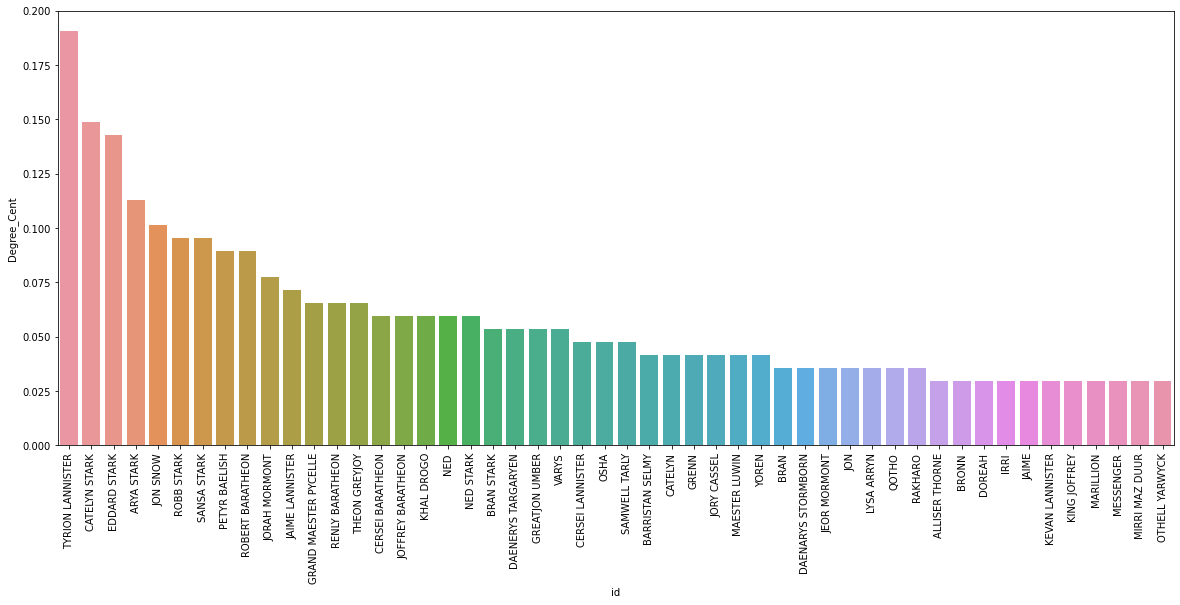

In [44]:
# Grau de Centralidade Season 1
grau_cent_s1 = nx.degree_centrality(G1)
temp1_N['Degree_Cent'] = temp1_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: grau_cent_s1[x])


fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp1_N.nlargest(50, 'Degree_Cent'), 
            x='id', y='Degree_Cent', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

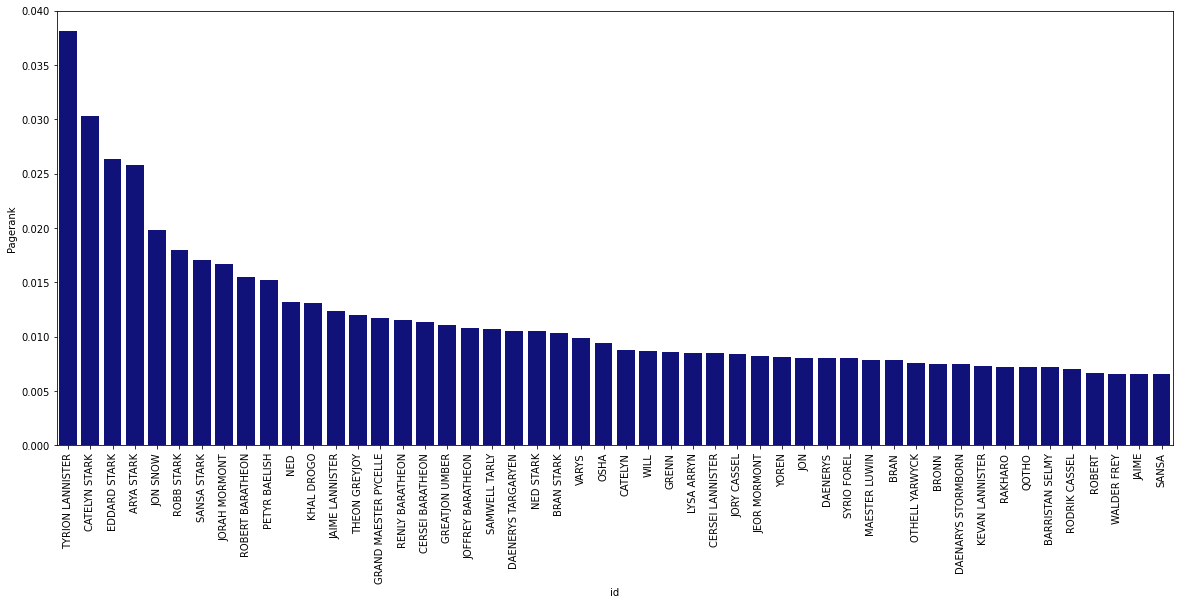

In [45]:
# PageRank Centrality
pr_s1 = nx.pagerank(G1)
temp1_N['Pagerank'] = temp1_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: pr_s1[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp1_N.nlargest(50, 'Pagerank'), 
            x='id', y='Pagerank', color = "darkblue",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


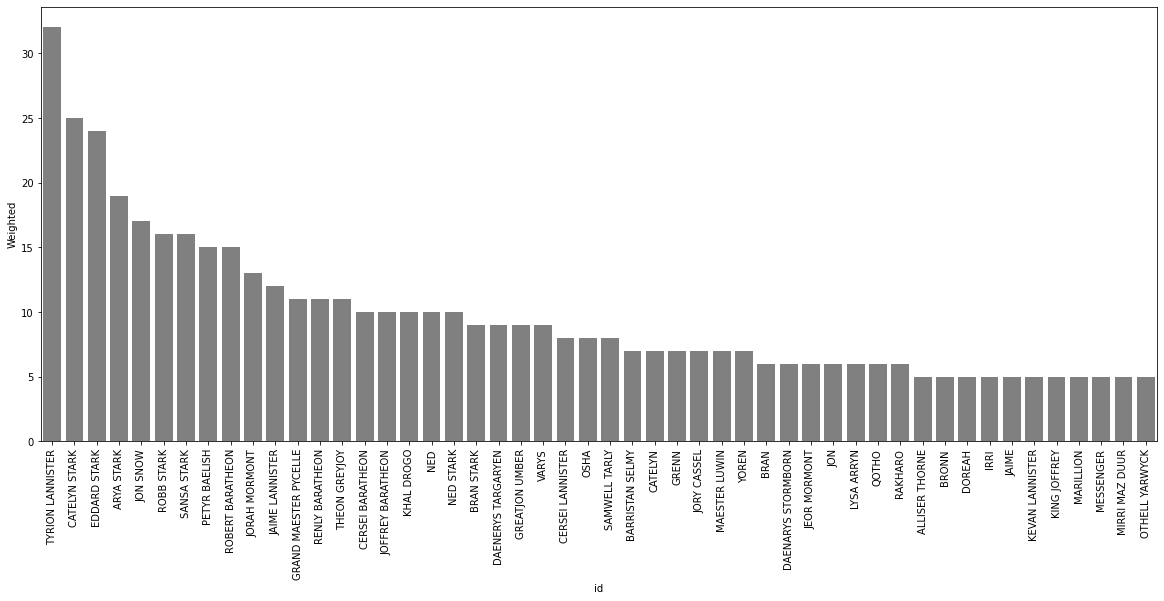

In [46]:
# Weighted Degree Centrality
Weighted_s1 = nx.degree(G1)
temp1_N['Weighted'] = temp1_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: Weighted_s1[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp1_N.nlargest(50, 'Weighted'), 
            x='id', y='Weighted', color = "gray",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


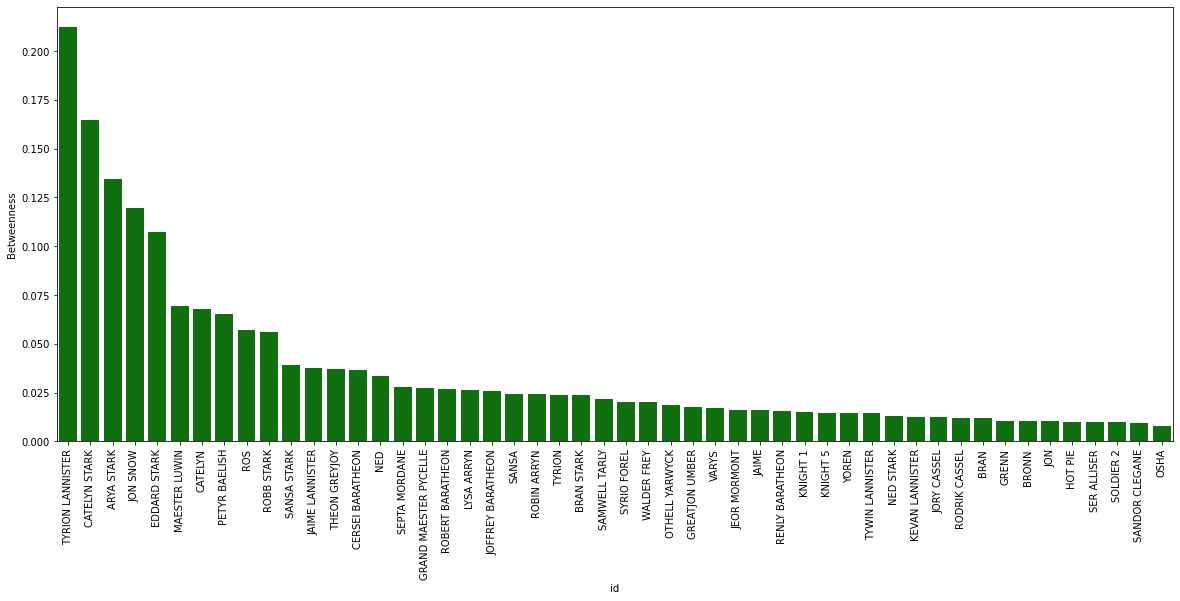

In [47]:
# Betweenness Degree Centrality
btw_s1 = nx.betweenness_centrality(G1)
temp1_N['Betweenness'] = temp1_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: btw_s1[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp1_N.nlargest(50, 'Betweenness'), 
            x='id', y='Betweenness', color = "green",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Season 2

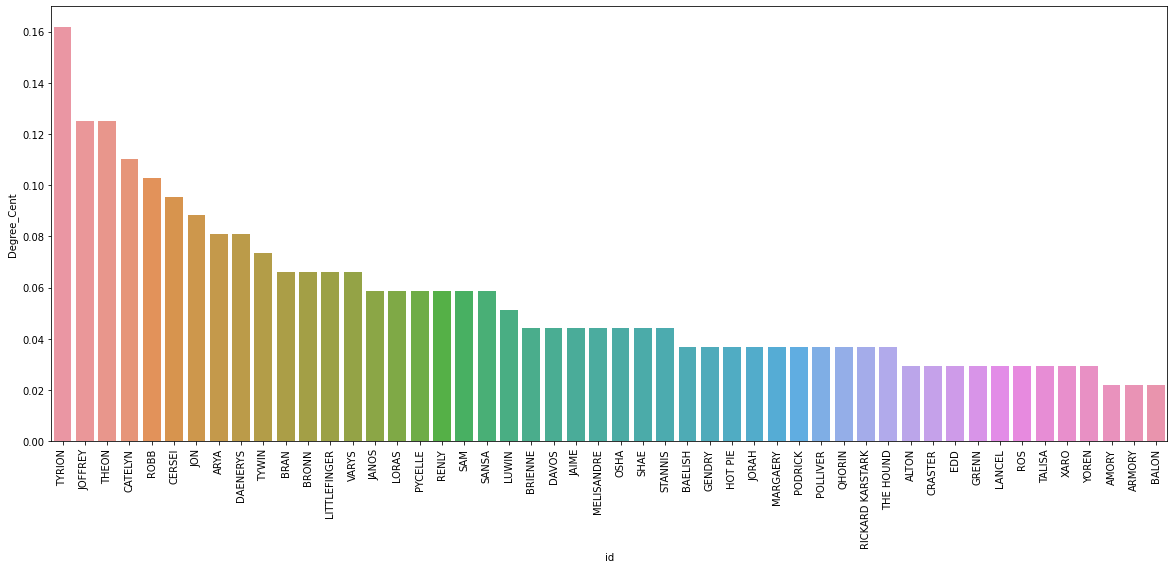

In [48]:
# Grau de Centralidade Season 2
grau_cent_s2 = nx.degree_centrality(G2)
temp2_N['Degree_Cent'] = temp2_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: grau_cent_s2[x])


fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp2_N.nlargest(50, 'Degree_Cent'), 
            x='id', y='Degree_Cent', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

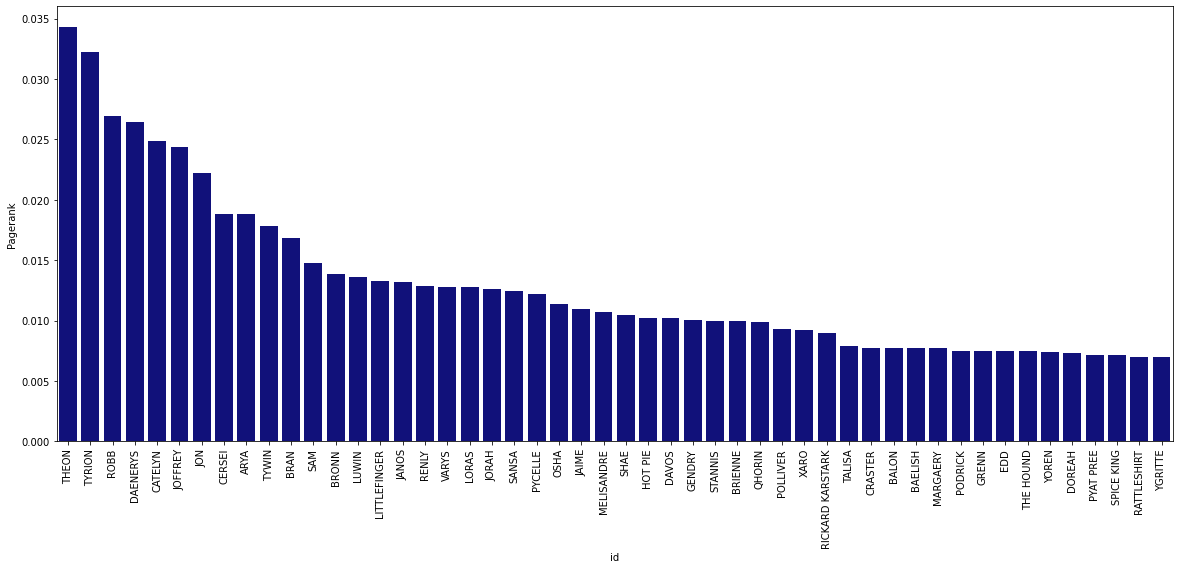

In [49]:
# PageRank Centrality Season 2
pr_s2 = nx.pagerank(G2)
temp2_N['Pagerank'] = temp2_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: pr_s2[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp2_N.nlargest(50, 'Pagerank'), 
            x='id', y='Pagerank', color = "darkblue",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


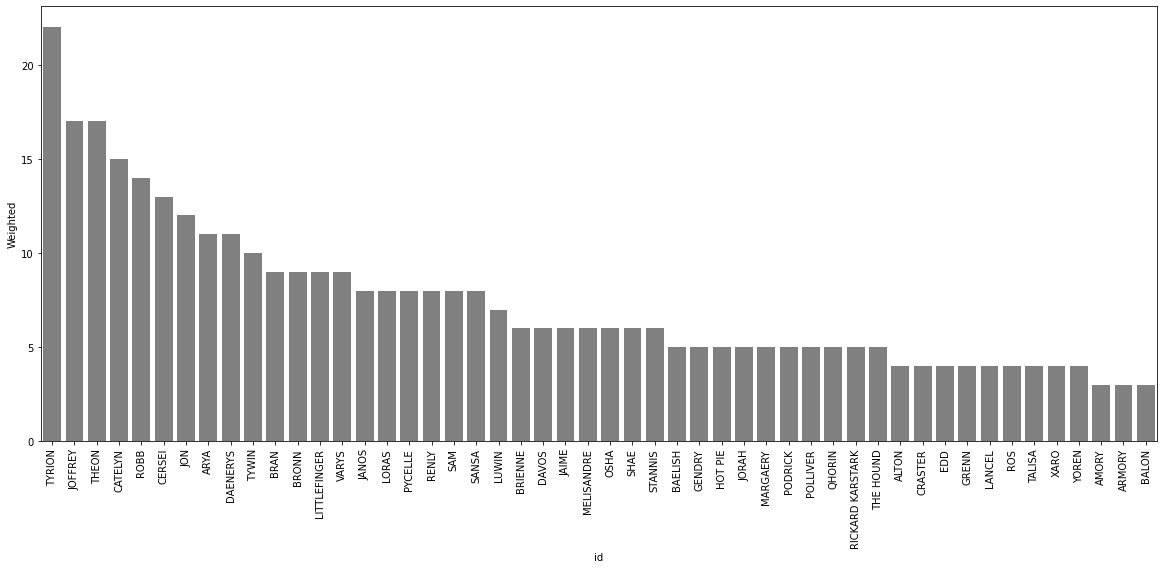

In [50]:
# Weighted Degree Centrality Season 2
Weighted_s2 = nx.degree(G2)
temp2_N['Weighted'] = temp2_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: Weighted_s2[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp2_N.nlargest(50, 'Weighted'), 
            x='id', y='Weighted', color = "gray",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


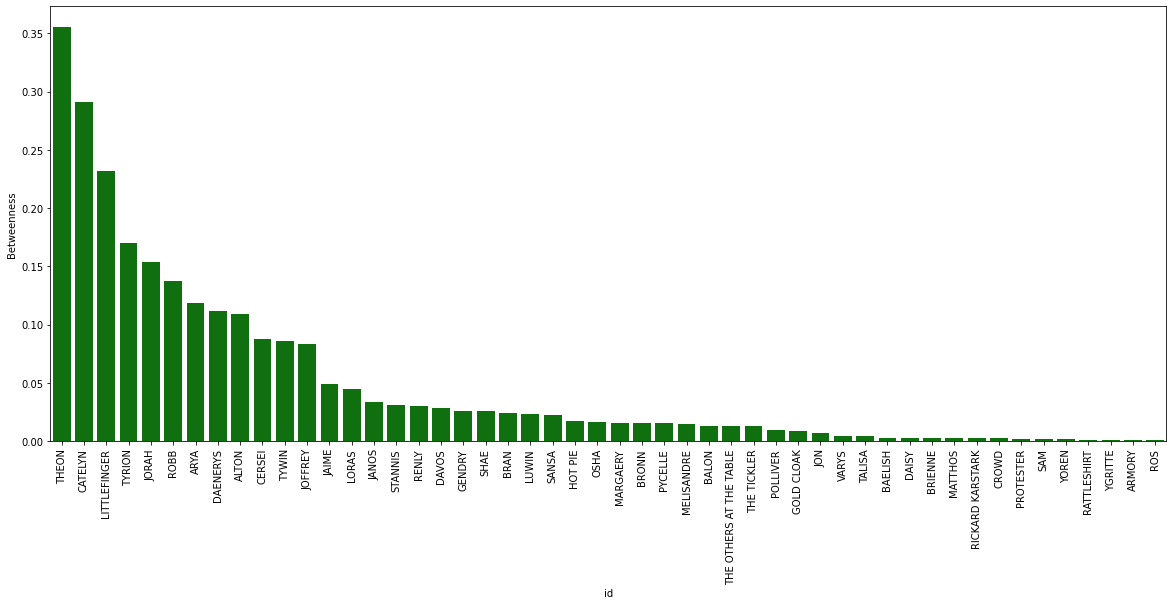

In [51]:
# Betweenness Degree Centrality Season 2
btw_s2 = nx.betweenness_centrality(G2)
temp2_N['Betweenness'] = temp2_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: btw_s2[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp2_N.nlargest(50, 'Betweenness'), 
            x='id', y='Betweenness', color = "green",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Season 3

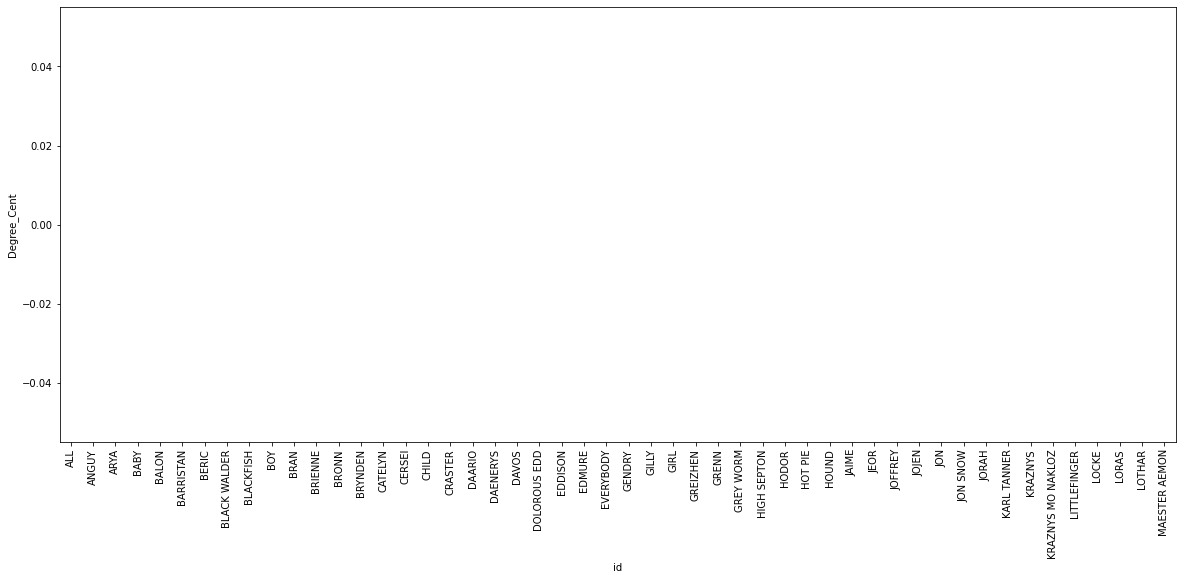

In [52]:
# Grau de Centralidade Season 3
grau_cent_s3 = nx.degree_centrality(G3)
temp3_N['Degree_Cent'] = temp3_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: grau_cent_s3[x]).astype(int)


fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp3_N.nlargest(50, 'Degree_Cent'), 
            x='id', y='Degree_Cent', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

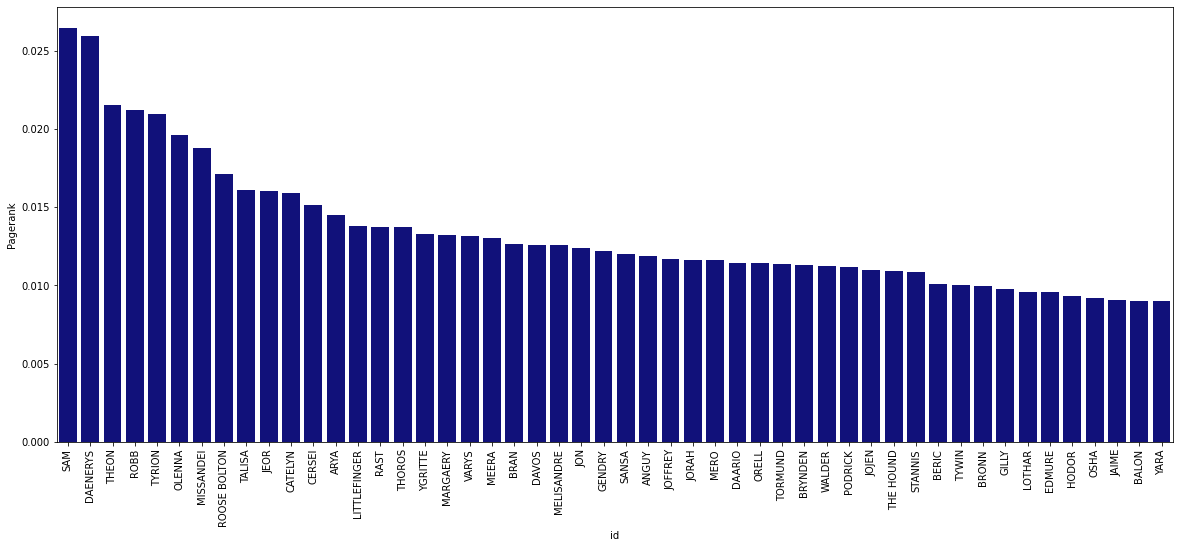

In [53]:
# PageRank Centrality Season 3
pr_s3 = nx.pagerank(G3)
temp3_N['Pagerank'] = temp3_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: pr_s3[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp3_N.nlargest(50, 'Pagerank'), 
            x='id', y='Pagerank', color = "darkblue",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


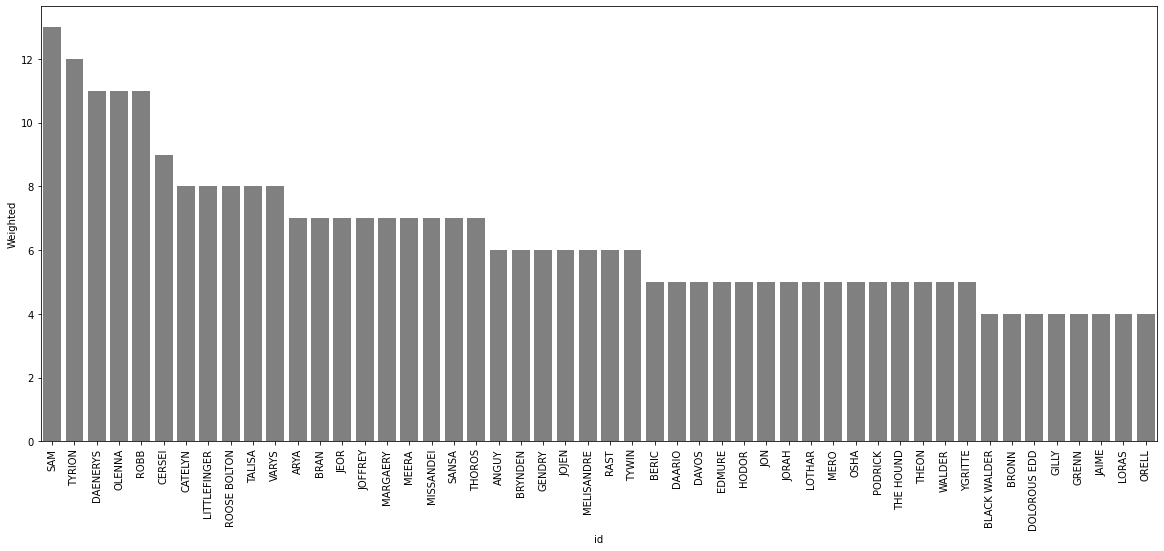

In [54]:
# Weighted Degree Centrality Season 3
Weighted_s3 = nx.degree(G3)
temp3_N['Weighted'] = temp3_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: Weighted_s3[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp3_N.nlargest(50, 'Weighted'), 
            x='id', y='Weighted', color = "gray",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


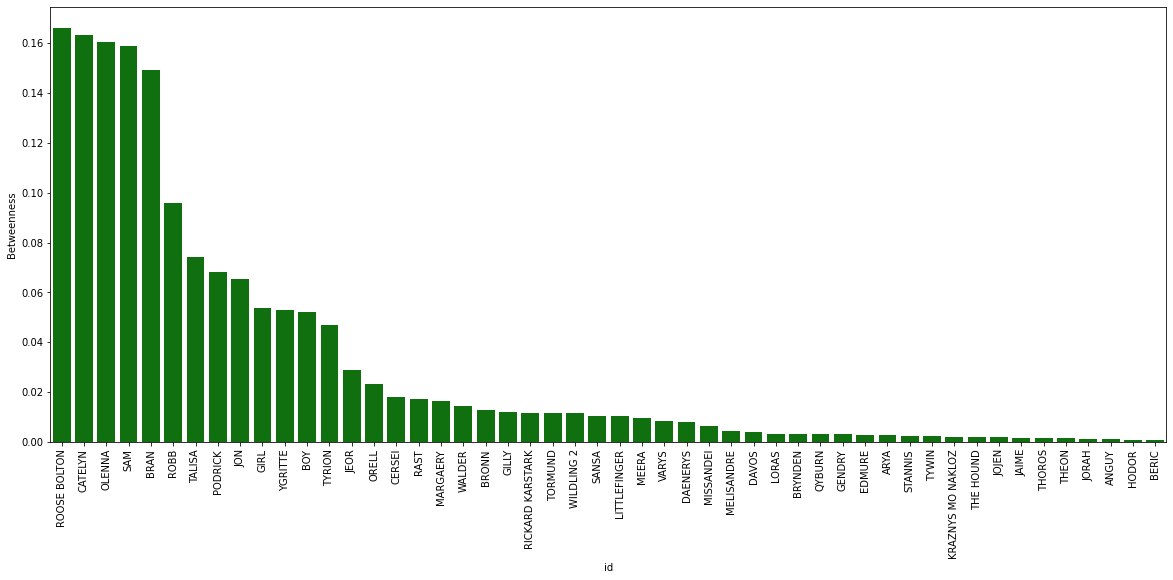

In [55]:
# Betweenness Degree Centrality Season 3
btw_s3 = nx.betweenness_centrality(G3)
temp3_N['Betweenness'] = temp3_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: btw_s3[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp3_N.nlargest(50, 'Betweenness'), 
            x='id', y='Betweenness', color = "green",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Season 4

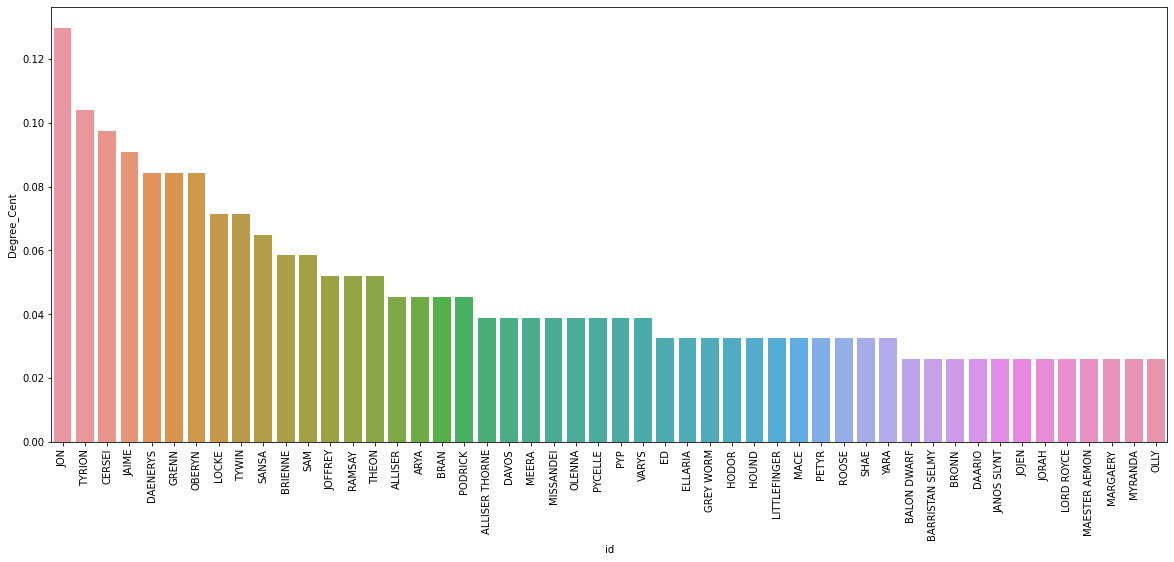

In [56]:
# Grau de Centralidade Season 4
grau_cent_s4 = nx.degree_centrality(G4)
temp4_N['Degree_Cent'] = temp4_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: grau_cent_s4[x])


fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp4_N.nlargest(50, 'Degree_Cent'), 
            x='id', y='Degree_Cent', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

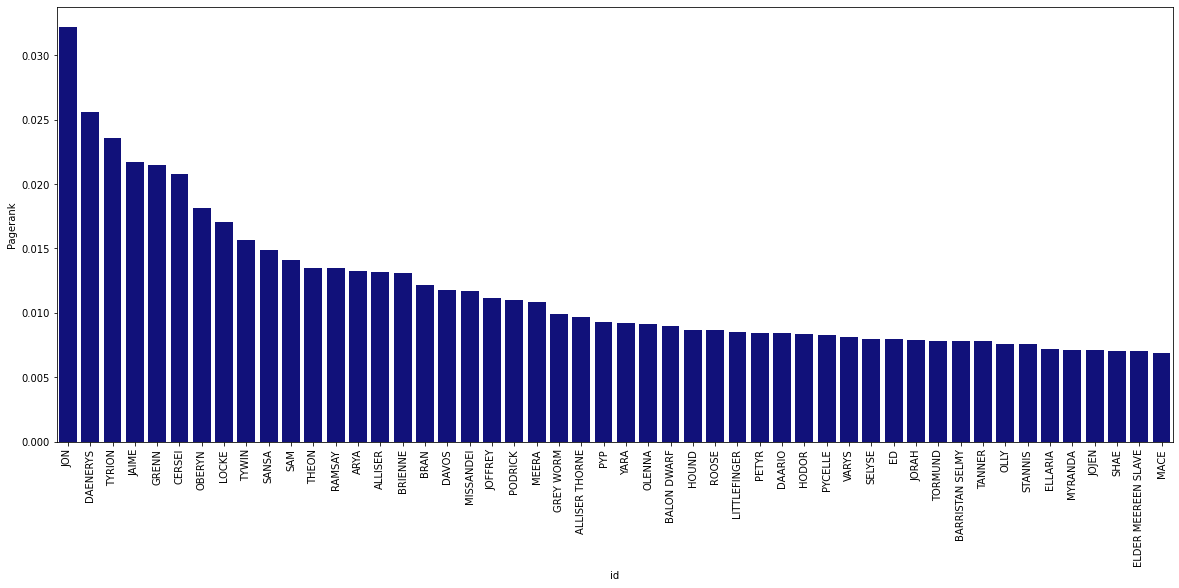

In [57]:
# PageRank Centrality Season 4
pr_s4 = nx.pagerank(G4)
temp4_N['Pagerank'] = temp4_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: pr_s4[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp4_N.nlargest(50, 'Pagerank'), 
            x='id', y='Pagerank', color = "darkblue",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


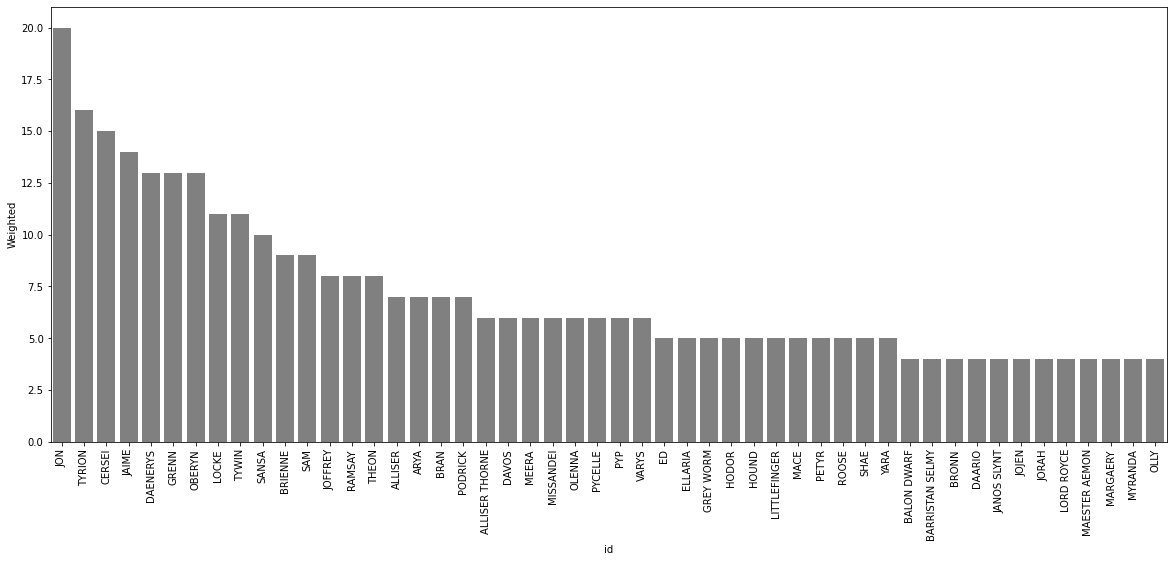

In [58]:
# Weighted Degree Centrality Season 4
Weighted_s4 = nx.degree(G4)
temp4_N['Weighted'] = temp4_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: Weighted_s4[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp4_N.nlargest(50, 'Weighted'), 
            x='id', y='Weighted', color = "gray",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


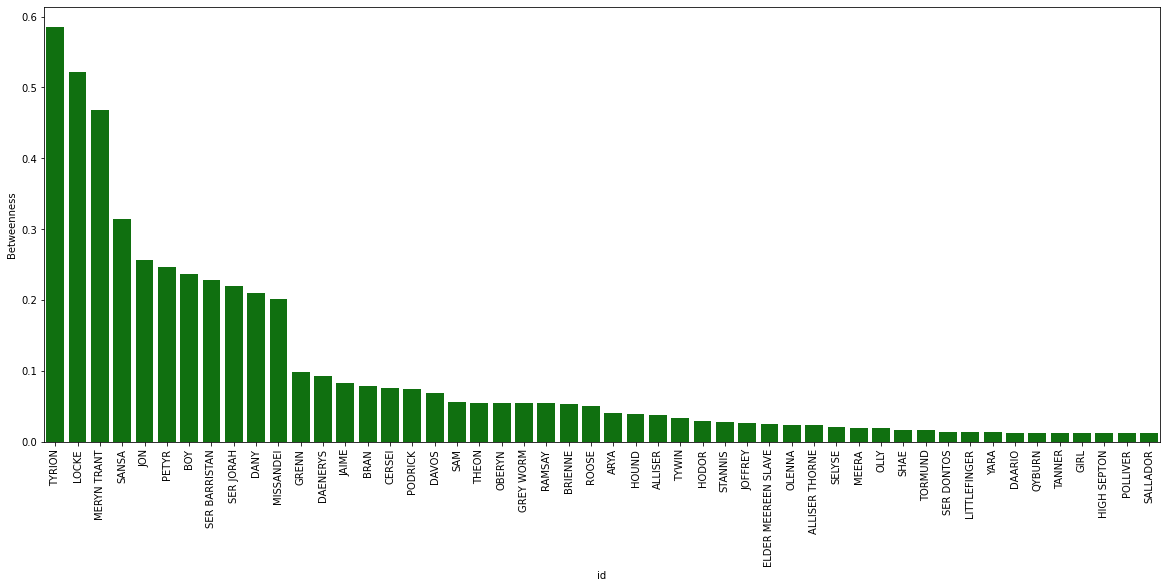

In [59]:
# Betweenness Degree Centrality Season 4
btw_s4 = nx.betweenness_centrality(G4)
temp4_N['Betweenness'] = temp4_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: btw_s4[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp4_N.nlargest(50, 'Betweenness'), 
            x='id', y='Betweenness', color = "green",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Season 6

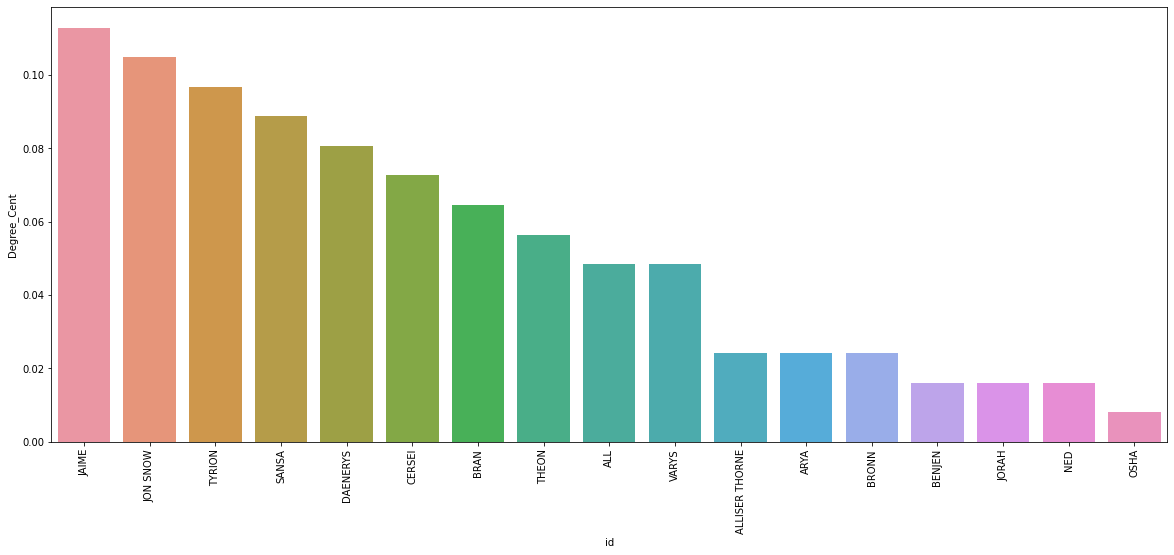

In [60]:
# Grau de Centralidade Season 6
grau_cent_s6 = nx.degree_centrality(G6)
temp6_N['Degree_Cent'] = temp6_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x:  grau_cent_s6.get(x))


fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp6_N.nlargest(50, 'Degree_Cent'), 
            x='id', y='Degree_Cent', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

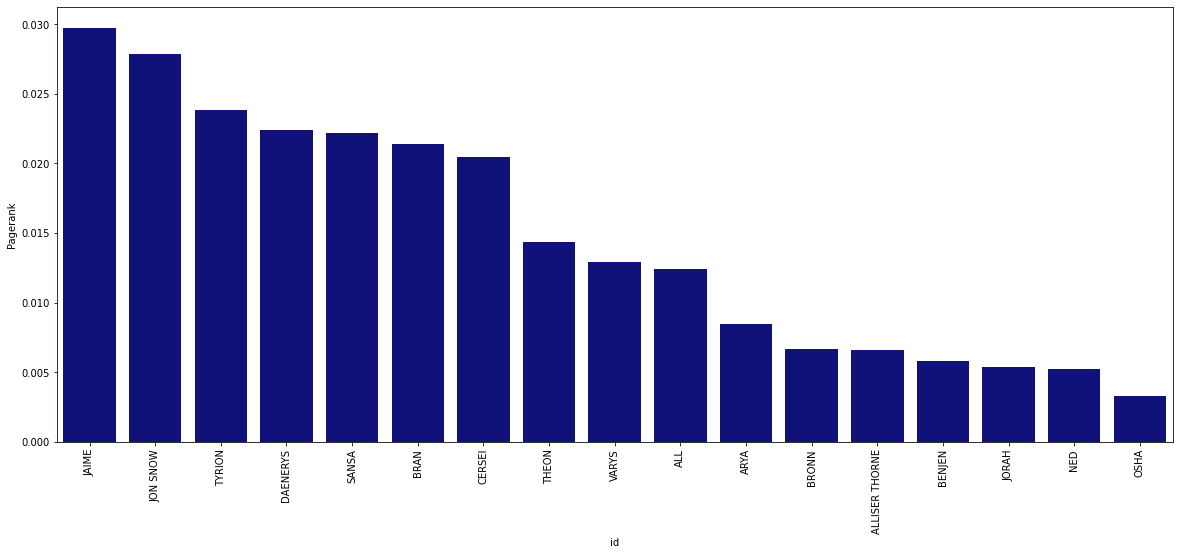

In [61]:
# PageRank Centrality Season 6
pr_s6 = nx.pagerank(G6)
temp6_N['Pagerank'] = temp6_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: pr_s6.get(x))

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp6_N.nlargest(50, 'Pagerank'), 
            x='id', y='Pagerank', color = "darkblue",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


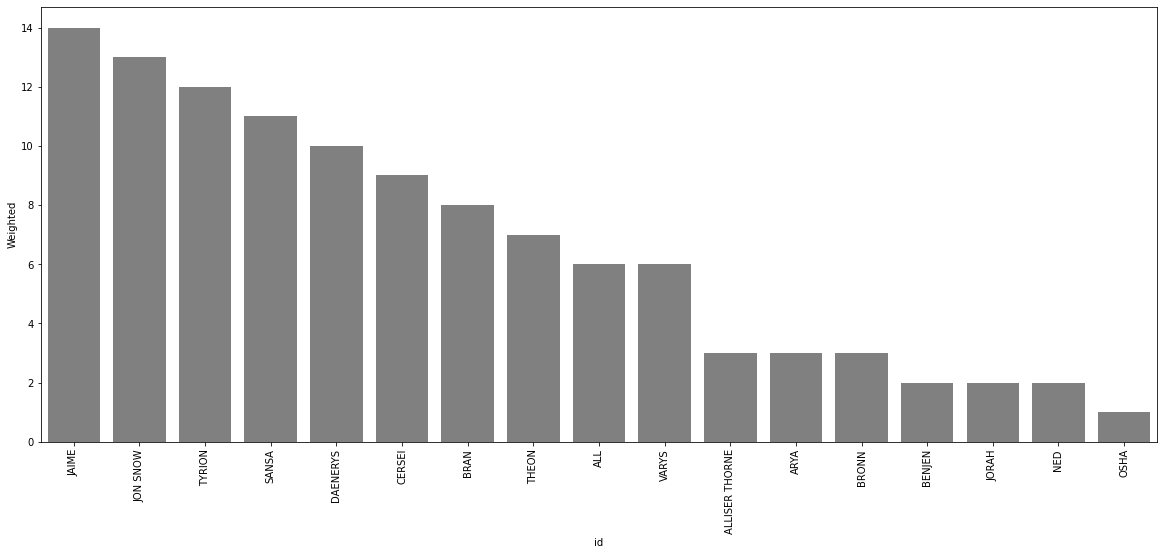

In [62]:
# Weighted Degree Centrality Season 6
Weighted_s6 = nx.degree(G6)
temp6_N['Weighted'] = temp6_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: dict(Weighted_s6).get(x))

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp6_N.nlargest(50, 'Weighted'), 
            x='id', y='Weighted', color = "gray",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

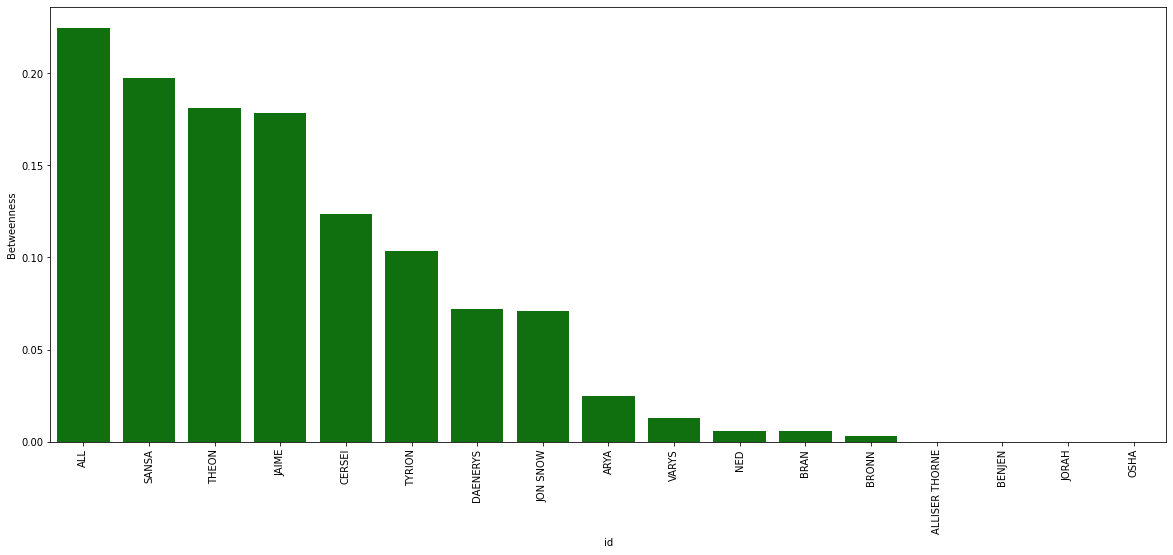

In [63]:
# Betweenness Degree Centrality Season 2
btw_s6 = nx.betweenness_centrality(G6)
temp6_N['Betweenness'] = temp6_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: btw_s6.get(x))

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp6_N.nlargest(50, 'Betweenness'), 
            x='id', y='Betweenness', color = "green",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Season 7

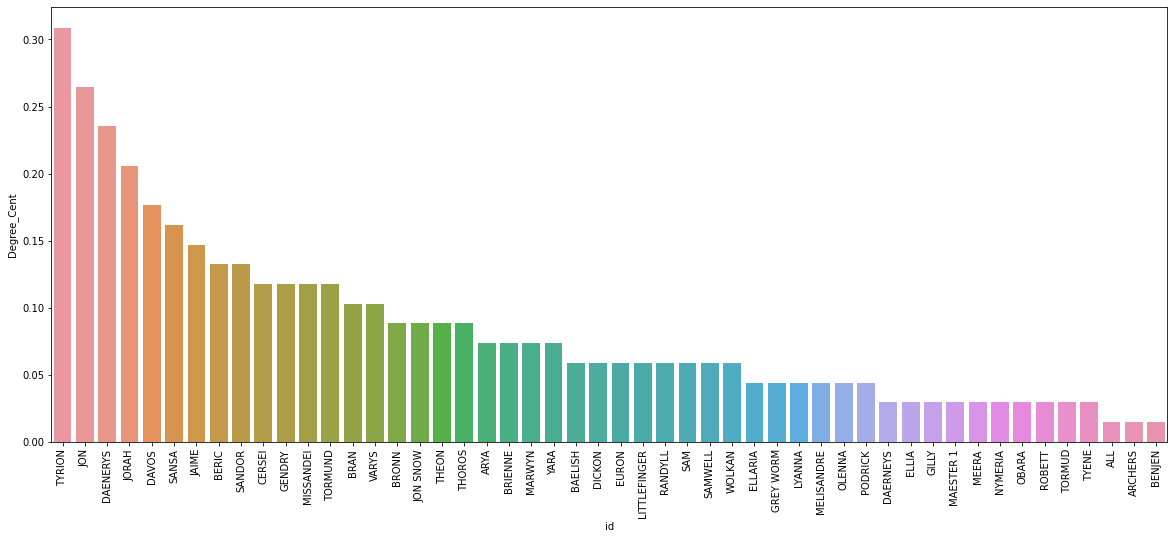

In [64]:
# Grau de Centralidade Season 7
grau_cent_s7 = nx.degree_centrality(G7)
temp7_N['Degree_Cent'] = temp7_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: grau_cent_s7[x])


fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp7_N.nlargest(50, 'Degree_Cent'), 
            x='id', y='Degree_Cent', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

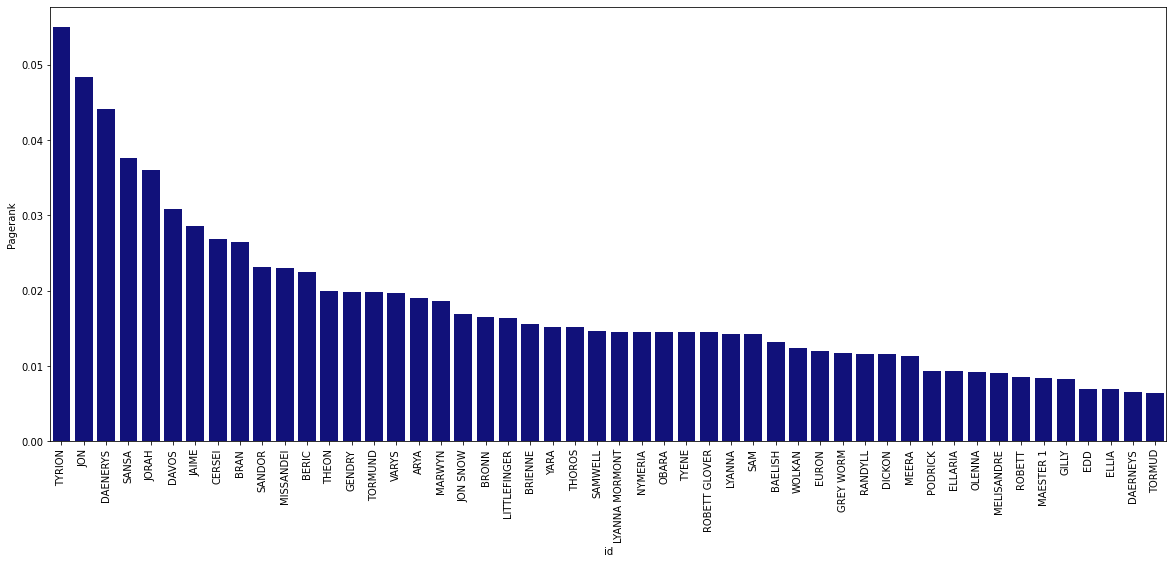

In [65]:
# PageRank Centrality Season 7
pr_s7 = nx.pagerank(G7)
temp7_N['Pagerank'] = temp7_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: pr_s7[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp7_N.nlargest(50, 'Pagerank'), 
            x='id', y='Pagerank', color = "darkblue",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


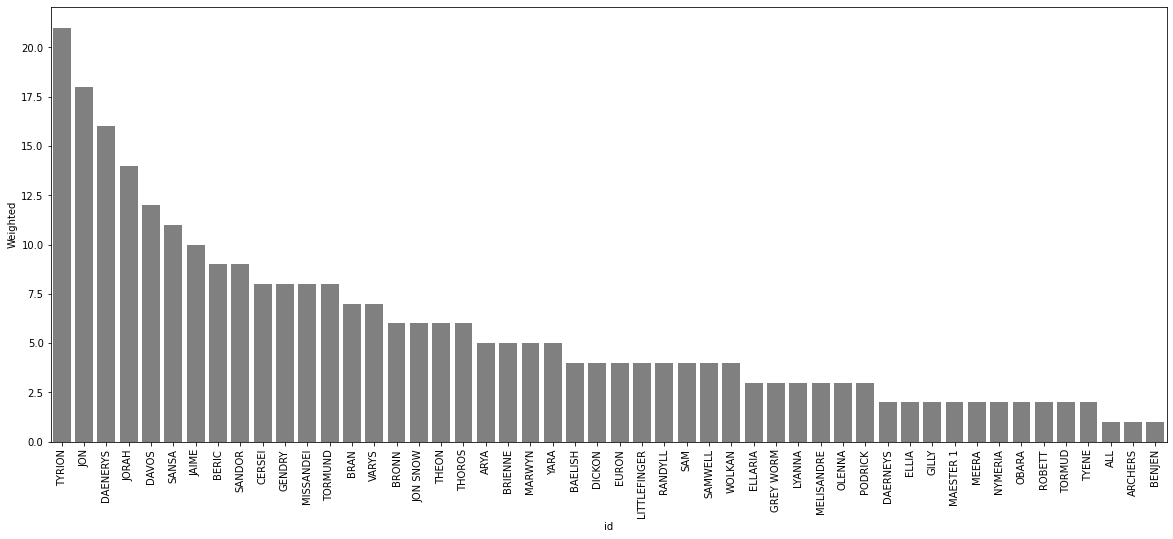

In [66]:
# Weighted Degree Centrality Season 7
Weighted_s7 = nx.degree(G7)
temp7_N['Weighted'] = temp7_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: Weighted_s7[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp7_N.nlargest(50, 'Weighted'), 
            x='id', y='Weighted', color = "gray",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


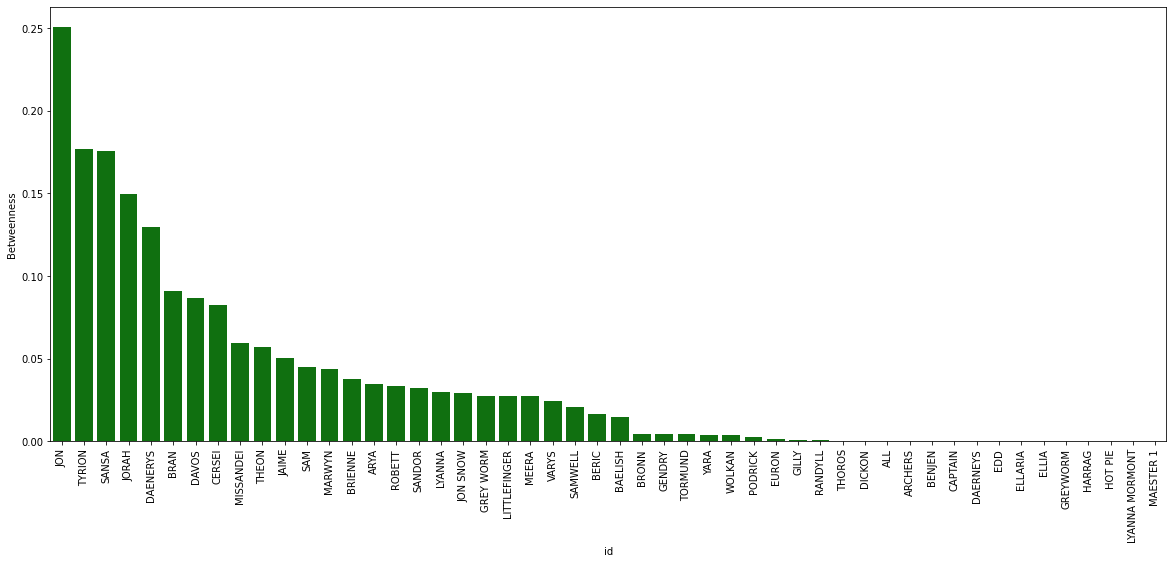

In [67]:
# Betweenness Degree Centrality Season 7
btw_s7 = nx.betweenness_centrality(G7)
temp7_N['Betweenness'] = temp7_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: btw_s7[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp7_N.nlargest(50, 'Betweenness'), 
            x='id', y='Betweenness', color = "green",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Season 8

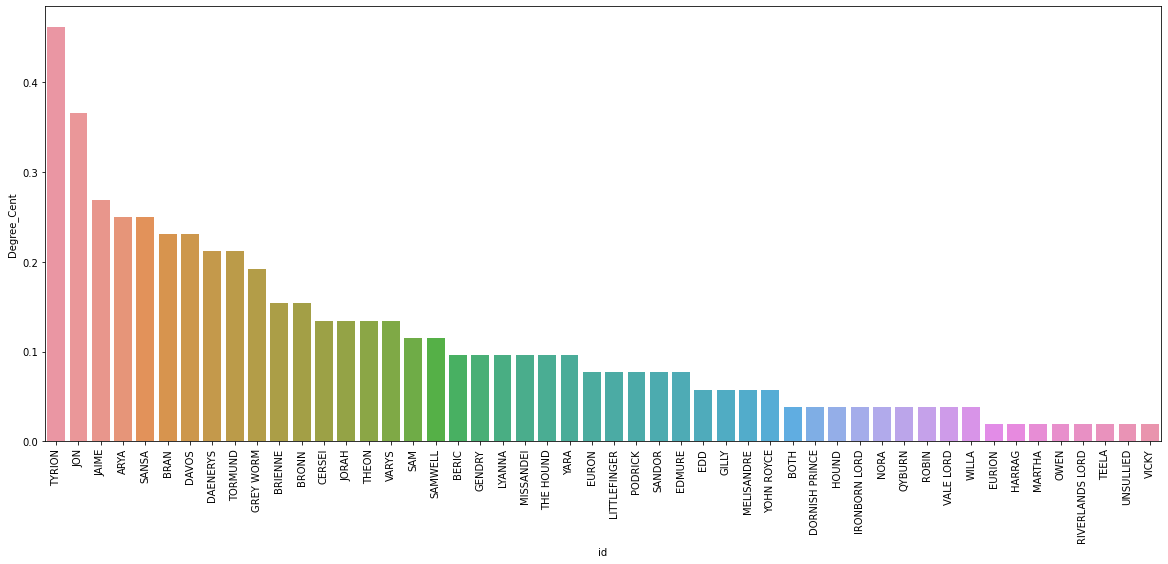

In [68]:
# Grau de Centralidade Season 8
grau_cent_s8 = nx.degree_centrality(G8)
temp8_N['Degree_Cent'] = temp8_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: grau_cent_s8[x])


fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp8_N.nlargest(50, 'Degree_Cent'), 
            x='id', y='Degree_Cent', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

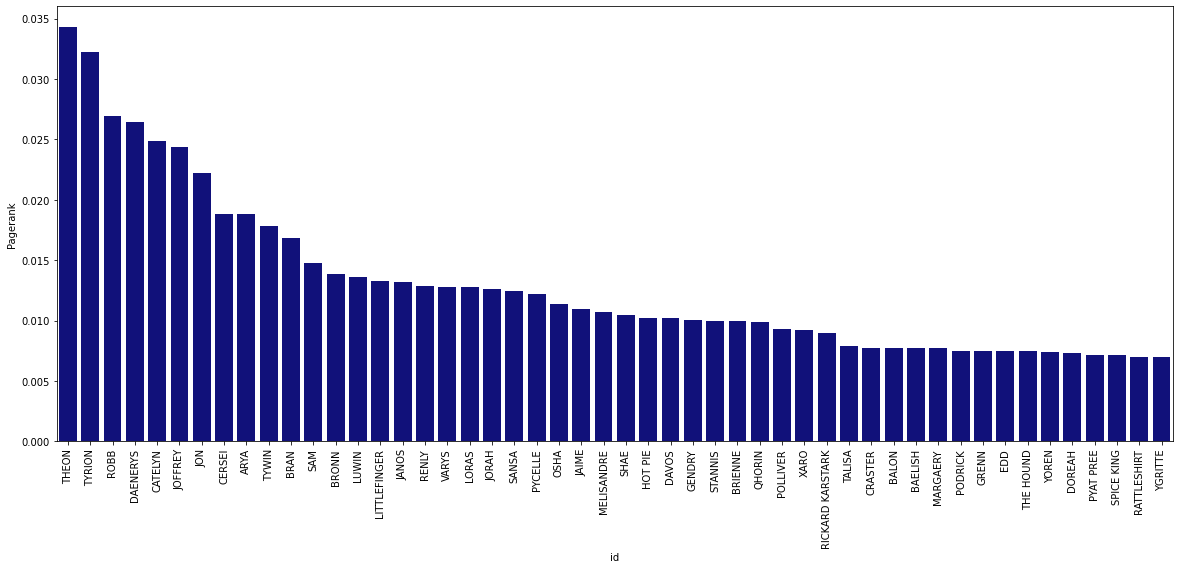

In [69]:
# PageRank Centrality Season 2
pr_s8 = nx.pagerank(G8)
temp8_N['Pagerank'] = temp8_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: pr_s8[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp2_N.nlargest(50, 'Pagerank'), 
            x='id', y='Pagerank', color = "darkblue",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


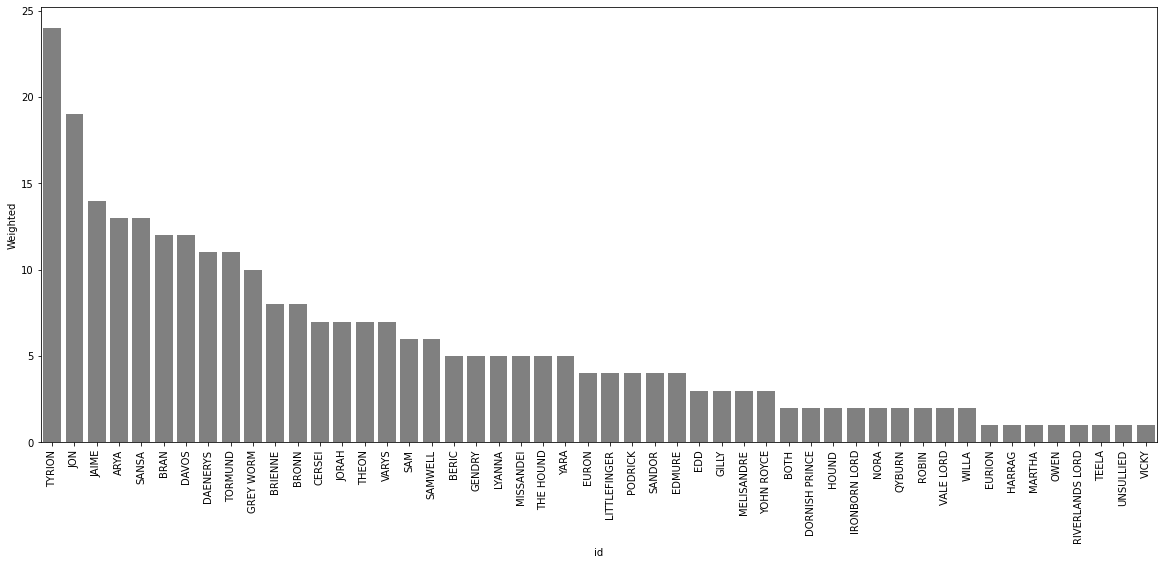

In [70]:
# Weighted Degree Centrality Season 8
Weighted_s8 = nx.degree(G8)
temp8_N['Weighted'] = temp8_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: Weighted_s8[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp8_N.nlargest(50, 'Weighted'), 
            x='id', y='Weighted', color = "gray",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


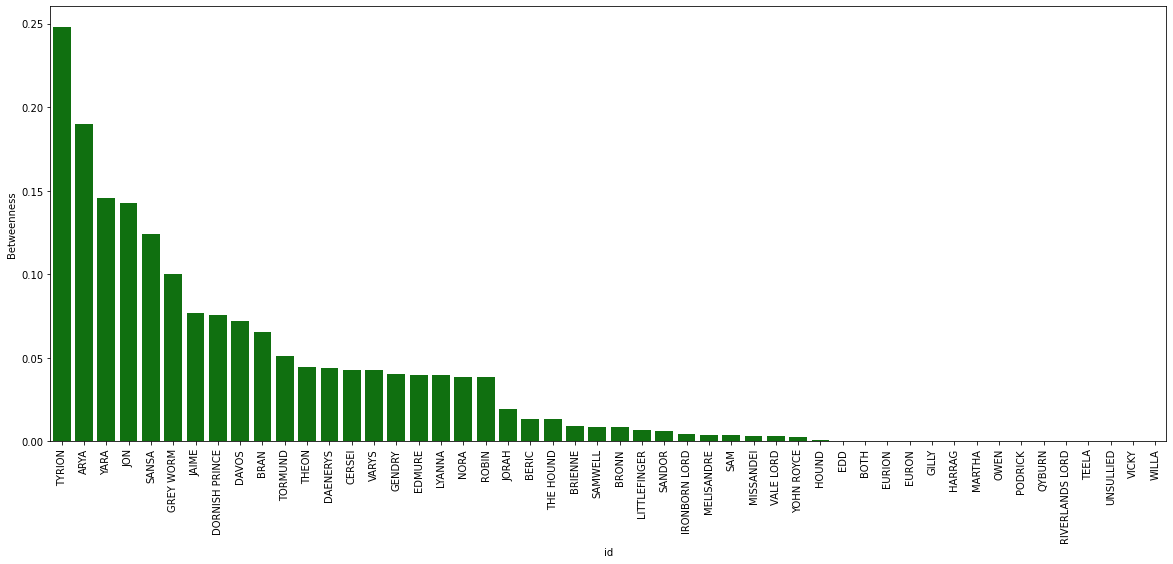

In [71]:
# Betweenness Degree Centrality Season 8
btw_s8 = nx.betweenness_centrality(G8)
temp8_N['Betweenness'] = temp8_N['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: btw_s8[x])

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=temp8_N.nlargest(50, 'Betweenness'), 
            x='id', y='Betweenness', color = "green",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Medidas e plots Globais

In [72]:
# Definindo paramentros para controle : Size / Color
tamG=nx.betweenness_centrality(G)
colG=nx.pagerank(G)

weightsG = np.array([i['Weight'] for i in dict(G.edges).values()])
sizesG = np.array([tamG[i] for i in G])
colorsG = np.array([colG[i] for i in G])

In [73]:
# Definindo os Nodes a partir dos Edges
labelsG = {
    list(G.nodes)[n]: (list(G.nodes)[n]
                       # selecionando somente os pesos acima de 100
        if len(list(nx.all_neighbors(G, list(G.nodes)[n])))>100
        else '')
    for n in range(len(G.nodes))
}

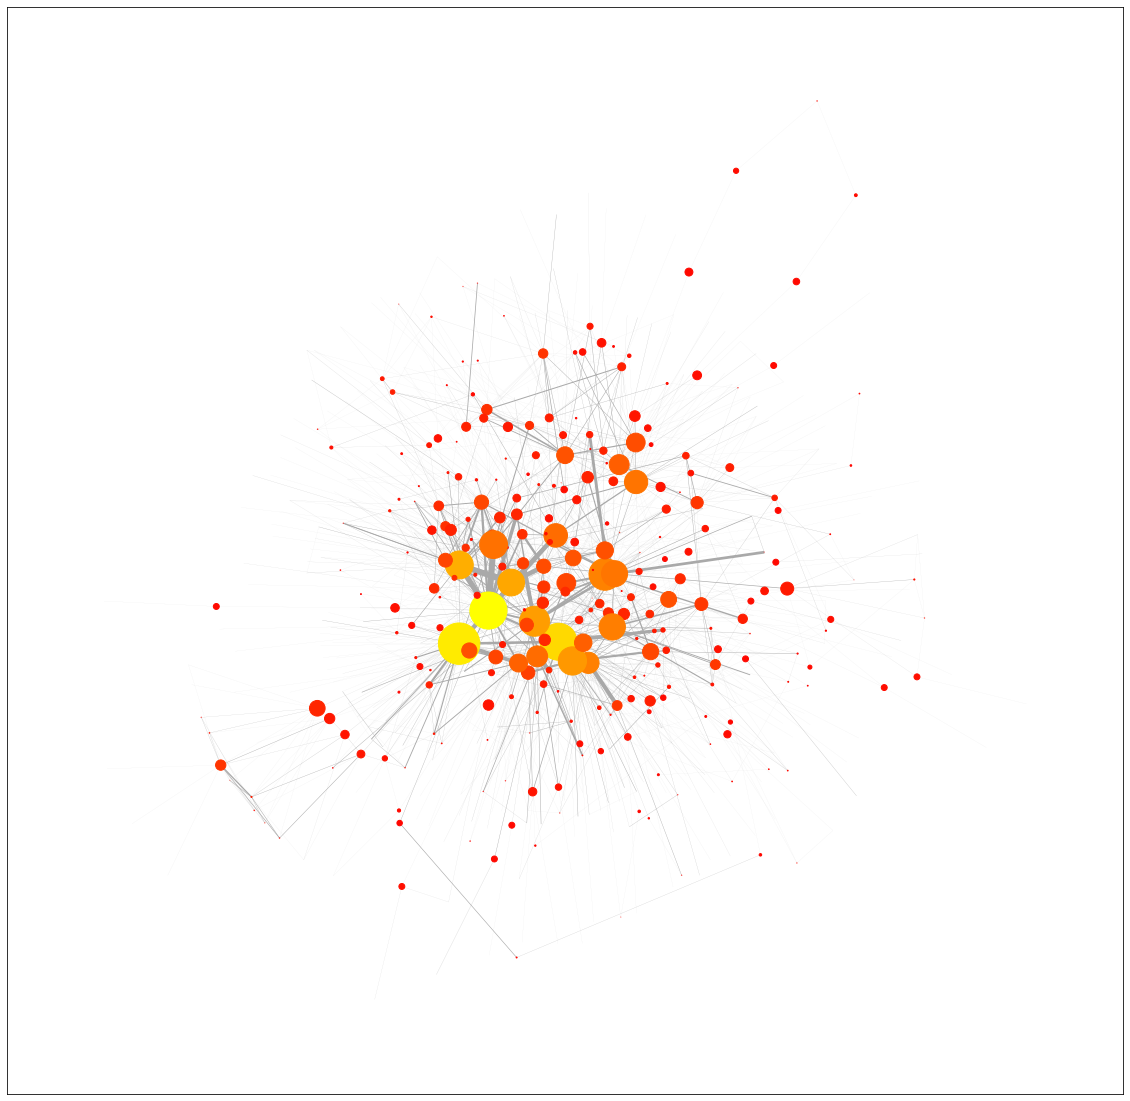

In [74]:
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G,
        pos=nx.kamada_kawai_layout(G),
        node_size=10000*sizesG,
        node_color=colorsG,
        cmap="autumn")

nx.draw_networkx_edges(G,
        pos=nx.kamada_kawai_layout(G),
        width=0.04*weightsG,
        edge_color="darkgray")

labels=nx.draw_networkx_labels(G,
                        pos=nx.kamada_kawai_layout(G),
                        labels=labelsG,
                        font_size=15,
                        font_family="calibri",
                        font_weight="bold")

### Medidas de Centralidade Global

In [75]:
# Grau de Centralidade Global
grau_cent_G = nx.degree_centrality(G)
Nodes['Degree_Cent'] = Nodes['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: grau_cent_G.get(x))



# PageRank Centrality Global
pr_G = nx.pagerank(G)
Nodes['Pagerank'] = Nodes['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: pr_G.get(x))



# Closeness Degree Centrality Global
Closeness_G = nx.closeness_centrality(G)
Nodes['Closeness'] = Nodes['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: Closeness_G.get(x))


# Betweenness Degree Centrality Global
btw_G = nx.betweenness_centrality(G)
Nodes['Betweenness'] = Nodes['id'].apply(lambda x: x[0].upper() + x[1:].lower()).apply(lambda x: btw_G.get(x))


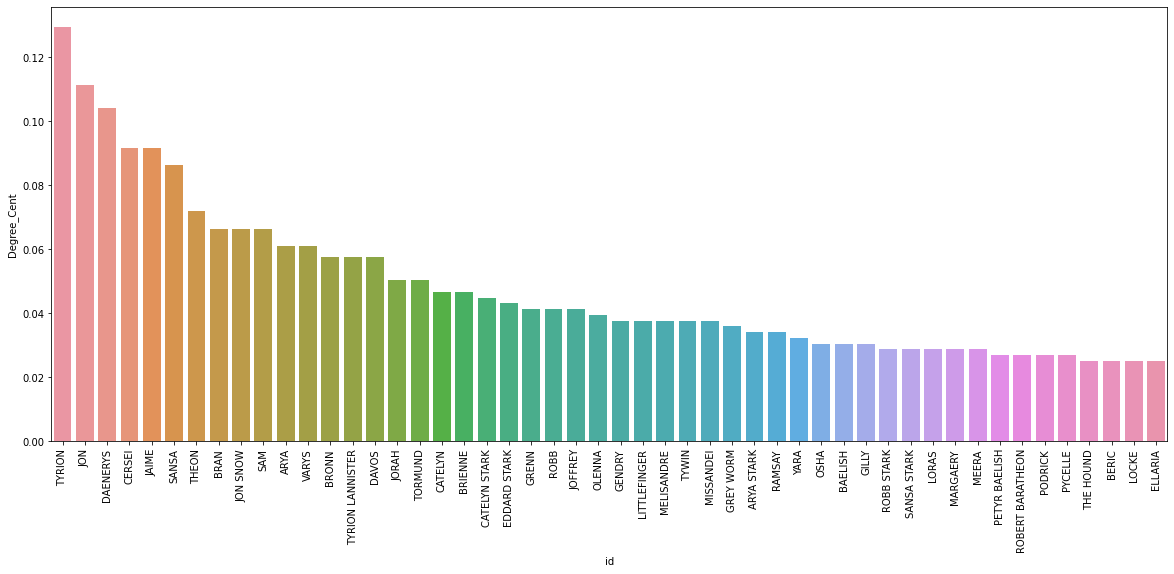

In [76]:
# Grau de Centralidade Global

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=Nodes.nlargest(50, 'Degree_Cent'), 
            x='id', y='Degree_Cent', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

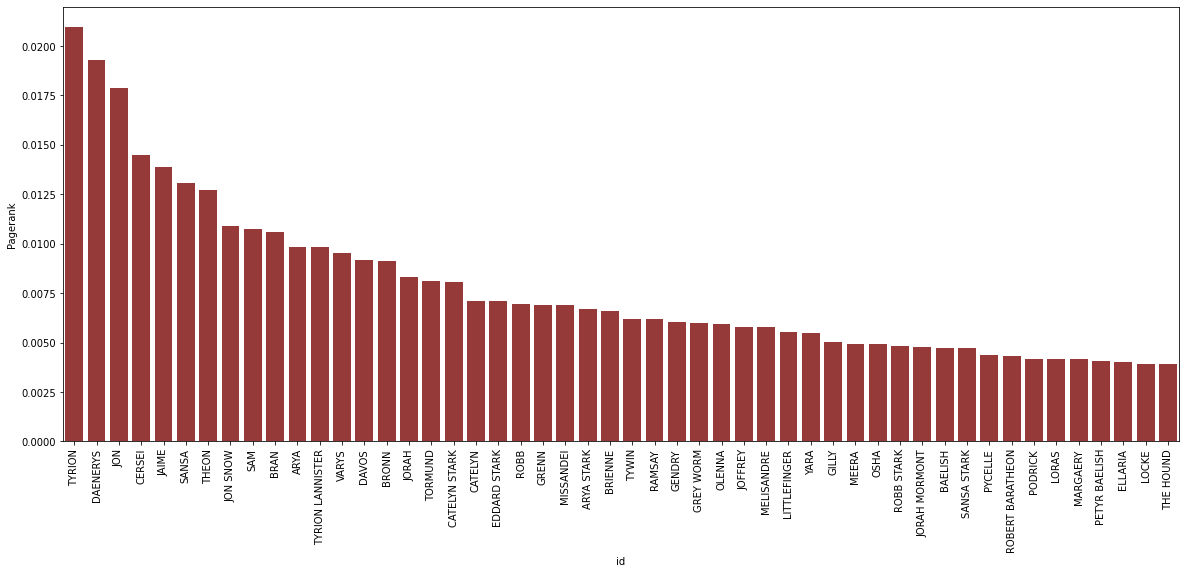

In [77]:
# PageRank Centrality Global

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=Nodes.nlargest(50, 'Pagerank'), 
            x='id', y='Pagerank', color = "brown",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


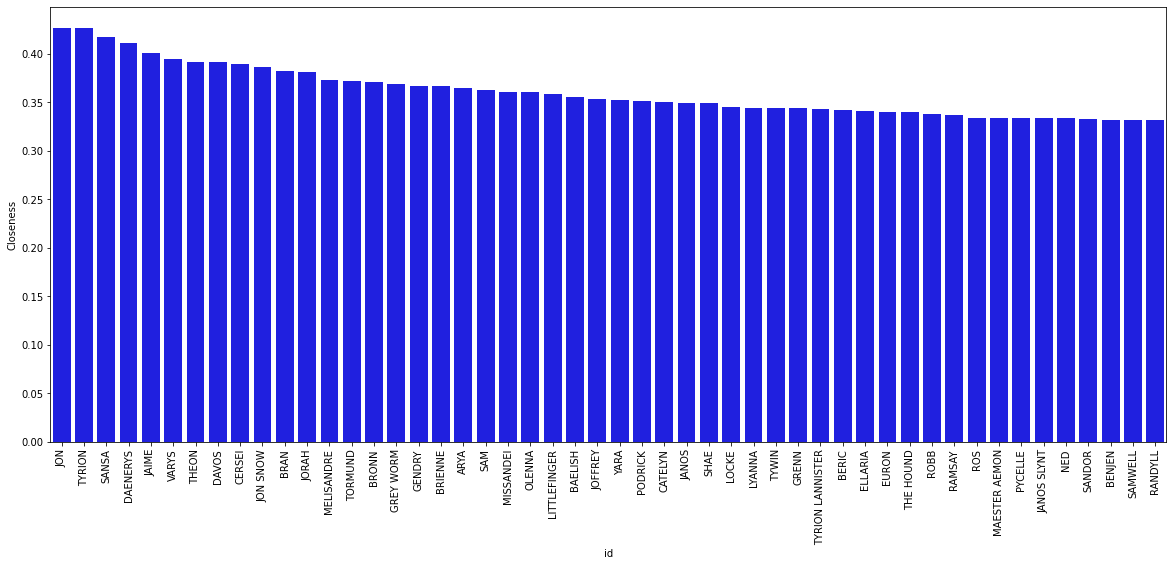

In [78]:
# Closeness Degree Centrality Global
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=Nodes.nlargest(50, 'Closeness'), 
            x='id', y='Closeness', color = "blue",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


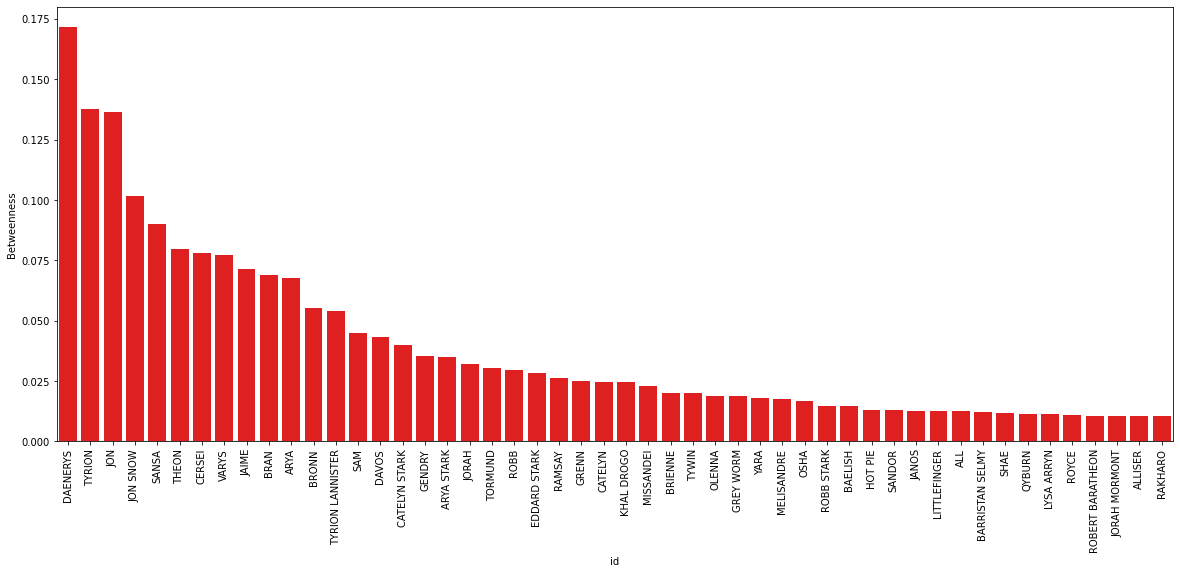

In [79]:
# Betweenness Degree Centrality Global

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=Nodes.nlargest(50, 'Betweenness'), 
            x='id', y='Betweenness', color = "red",
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Verificando o Maximo e o Minimo das Centralidades

In [80]:
max_grad = max(grau_cent_G, key=grau_cent_G.get)
min_grad = min(grau_cent_G, key=grau_cent_G.get)

max_close = max(Closeness_G, key=Closeness_G.get)
min_close = min(Closeness_G, key=Closeness_G.get)

max_bet = max(btw_G , key=btw_G .get)
min_bet = min(btw_G , key=btw_G .get)

max_pr = max(pr_G, key=pr_G.get)
min_pr = min(pr_G, key=pr_G.get)

print("O Node Com o Máximo Grau de Centralidade é", max_grad, "e o Node com o Mínimo de Grau de Centralidade é", min_grad)
print("O Node Com o Máximo de Proximidade Central é", max_close, "e o Node Com o Máximo de Proximidade Central é", min_close)
print("O Node Com o Maior Alta Conectividade é", max_bet, "e Node Com o menor taxa de Conectividade é", min_bet)
print("O Node Com o Máximo de Interações com o Vizinho é", max_pr, "e o Node com a menor intereção entre os Vizinhos é", min_pr)

O Node Com o Máximo Grau de Centralidade é Tyrion e o Node com o Mínimo de Grau de Centralidade é Ahsa
O Node Com o Máximo de Proximidade Central é Jon e o Node Com o Máximo de Proximidade Central é Lyanna mormont
O Node Com o Maior Alta Conectividade é Daenerys e Node Com o menor taxa de Conectividade é Ahsa
O Node Com o Máximo de Interações com o Vizinho é Tyrion e o Node com a menor intereção entre os Vizinhos é Jofffrey


## Conclusão

### Tyrion é o node mais dominante em relação aos demais nodes, em contra partida, os nodes com baixa medida de centralidade, indica que os personagens não tem muita influência na série. Portanto, podemos concluir que Tyrion é o personagem principal da série. 